# 1. Classification Between Aged and Pristine Signal

Noise signals were not manually taken out (too many waveforms, and waveform numbers didn't match up so I couldn't manually take them out).

In [50]:
import pandas as pd
import numpy as np
data = pd.read_csv('/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/5 Experiments/Long Term Cycling Experiments/Machine Learning Files/All Hits.csv', delimiter =',')

In [51]:
data

,Waveform Number,Rise Time,Counts to Peak,Energy,Duration,Amplitude,Average Frequency,RMS,ASL,PCNTS,Threshold,Reverberation Frequency,Initiation Frequency,Signal Strength,Absolute Energy,Classification
0,1,64,3,0,116,35,25,0.0004,16,2,29,20,31,2830.0,9.920,Pristine
1,2,7,1,0,40,32,25,0.0004,16,1,29,1,142,793.0,2.220,Pristine
2,3,1,1,0,27,30,37,0.0004,16,1,29,1,1000,339.0,0.748,Pristine
3,4,9,2,0,28,32,71,0.0004,16,1,29,53,111,403.0,0.846,Pristine
4,5,9,1,0,28,26,35,0.0004,16,1,29,1,111,403.0,0.846,Pristine
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,336,25,3,0,67,31,44,0.0004,16,2,29,24,80,702.0,1.300,Aged
560,337,25,1,0,67,27,14,0.0004,16,1,29,1,40,702.0,1.300,Aged
561,338,25,1,0,67,27,14,0.0004,16,1,29,1,40,702.0,1.300,Aged
562,339,46,2,0,50,33,40,0.0004,16,2,29,1,43,881.0,2.420,Aged


In [52]:
# Extract classification column from data frame
classification = data['Classification']

In [53]:
# encode class values as integers
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(classification)
labels = encoder.transform(classification)

In [54]:
# 1 is pristine and 0 is aged
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [55]:
# get rid of columns we don't need
data.drop(['Waveform Number', 'Classification'], inplace=True, axis=1)

In [56]:
data

,Rise Time,Counts to Peak,Energy,Duration,Amplitude,Average Frequency,RMS,ASL,PCNTS,Threshold,Reverberation Frequency,Initiation Frequency,Signal Strength,Absolute Energy
0,64,3,0,116,35,25,0.0004,16,2,29,20,31,2830.0,9.920
1,7,1,0,40,32,25,0.0004,16,1,29,1,142,793.0,2.220
2,1,1,0,27,30,37,0.0004,16,1,29,1,1000,339.0,0.748
3,9,2,0,28,32,71,0.0004,16,1,29,53,111,403.0,0.846
4,9,1,0,28,26,35,0.0004,16,1,29,1,111,403.0,0.846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,25,3,0,67,31,44,0.0004,16,2,29,24,80,702.0,1.300
560,25,1,0,67,27,14,0.0004,16,1,29,1,40,702.0,1.300
561,25,1,0,67,27,14,0.0004,16,1,29,1,40,702.0,1.300
562,46,2,0,50,33,40,0.0004,16,2,29,1,43,881.0,2.420


In [7]:
# Use StandardScaler to standardize the features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(data)

In [8]:
# set aside 20% of train and test data for evaluation
from sklearn.model_selection import train_test_split

# The shuffle function randomly changes the order of the various rows.
# Finally, the random_state initializes the seed for the random function used to split the dataset.
# Setting the random state allows the experiment to be easily reproduced and ensures results within the same parameters.
X_train, X_test, y_train, y_test = train_test_split(scaled_data, labels,
    test_size=0.2, shuffle = True, random_state = 8)

In [22]:
# create deep learning model
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense

model = tf.keras.Sequential([
    tf.keras.layers.Dense(11, activation='relu', input_shape=(14,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [23]:
# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# Train the classifier
from keras.callbacks import EarlyStopping

early_stopping3 = EarlyStopping(monitor='val_loss', patience=20)
model_history = model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0,validation_split=0.2, callbacks=[early_stopping3])

In [25]:
# Validation loss over time
print('First ten values of validation loss:' + str(model_history.history['val_loss'][:10])+'\n')
print('Last ten values of validation loss:' + str(model_history.history['val_loss'][-10:]))

First ten values of validation loss:[0.6664785742759705, 0.6534761190414429, 0.6406787633895874, 0.6293855309486389, 0.6177037954330444, 0.6053277850151062, 0.5928311347961426, 0.5821823477745056, 0.5732120275497437, 0.5662689805030823]

Last ten values of validation loss:[0.27122896909713745, 0.27070483565330505, 0.27570897340774536, 0.27728989720344543, 0.27553316950798035, 0.2728239595890045, 0.26773032546043396, 0.2684914469718933, 0.2684074342250824, 0.27200350165367126]


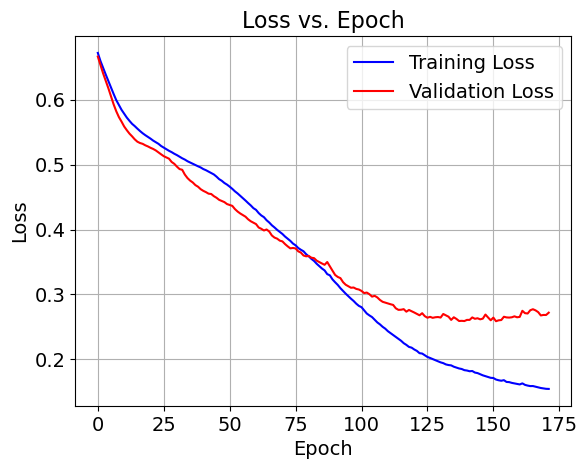

In [26]:
# Plot the loss vs. epochs of training
import matplotlib.pyplot as plt

epochs = range(len(model_history.history['val_loss']))

fig, ax = plt.subplots()
plt.plot(epochs, model_history.history["loss"], 'b', label='Training Loss')
plt.plot(epochs, model_history.history["val_loss"], 'r', label='Validation Loss')
plt.title("Loss vs. Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)

# Increase font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=14)

# plt.savefig("/Users/seungbinjoo/Desktop/loss_vs_epoch_plot.png", dpi=500)  # You can change the format and resolution as needed

plt.show()

In [27]:
# plt.savefig("/Users/seungbinjoo/Desktop/loss_vs_epoch_plot.png", dpi=500)  # You can change the format and resolution as needed

In [28]:
plt.close()

In [29]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

4/4 - 0s - loss: 0.4124 - accuracy: 0.8496 - 27ms/epoch - 7ms/step

Test accuracy: 0.8495575189590454


In [30]:
# Make predictions with test data
predictions = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [31]:
# The trained model's prediction on the test dataset
np.around(predictions)

array([[0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],

In [32]:
# The actual labels of the test dataset
y_test

array([0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0])

In [33]:
# Make confusion matrix
confusion_matrix = tf.math.confusion_matrix(
    y_test,
    np.around(predictions),
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
)

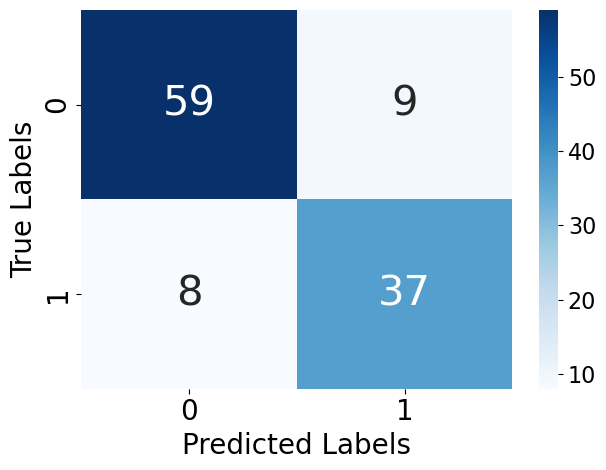

In [34]:
# Plot the confusion matrix using a heatmap
import seaborn as sns

heatmap = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', annot_kws={'fontsize': 30})
plt.xlabel('Predicted Labels',fontsize=20)
plt.ylabel('True Labels',fontsize=20)

# Increase font size of tick labels on x-axis
plt.xticks(fontsize=20)

# Increase font size of tick labels on y-axis
plt.yticks(fontsize=20)

colorbar = heatmap.collections[0].colorbar  # Get the colorbar object
colorbar.ax.tick_params(labelsize=16)  # Increase font size of colorbar ticks

plt.tight_layout()  # Helps in ensuring all elements of the plot are visible

# plt.savefig("/Users/seungbinjoo/Desktop/SoH_confusion_matrix.png", dpi=500)  # You can change the format and resolution as needed

plt.show()

In [35]:
# plt.savefig("/Users/seungbinjoo/Desktop/SoH_confusion_matrix.png", dpi=500)  # You can change the format and resolution as needed

In [36]:
plt.close()

# 2. Regression Using Neural Networks (Predicting Cycle Number)

Regression model based on neural networks will be very similar to the classification neural network. However there are a few changes that need to be made. The final output layer will be a single neuron, as I only need to regress one variable (predicted cycle number). The final layer will have a linear activation function. The loss function will be MSE.

After preprocessing (see preprocessing python notebook):

In [968]:
import pandas as pd
import numpy as np
data2 = pd.read_csv('/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/5 Experiments/Long Term Cycling Experiments/Machine Learning Files/Preprocessing for regression model/Aged Hits with targets.csv', delimiter =',')

In [969]:
data2

,Waveform Number,Rise Time,Counts to Peak,Energy,Duration,Amplitude,Average Frequency,RMS,ASL,PCNTS,Threshold,Reverberation Frequency,Initiation Frequency,Signal Strength,Absolute Energy,Classification,Cycle Number (Regression target)
0,1,1794,66,9,4538,37,14,0.0004,16,25,29,15,13,59300.0,146.000,Aged,0.000000
1,2,1771,145,28,7718,42,18,0.0006,18,43,29,18,24,178000.0,767.000,Aged,0.000000
2,3,1771,1,28,7718,27,0,0.0006,18,1,29,1,0,178000.0,767.000,Aged,0.000000
3,4,30,3,0,50,34,60,0.0004,16,3,29,1,100,1100.0,3.520,Aged,0.002778
4,5,2,1,0,2,30,500,0.0004,16,1,29,1000,500,42.7,0.114,Aged,0.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,336,25,3,0,67,31,44,0.0004,16,2,29,24,80,702.0,1.300,Aged,102.425000
336,337,25,1,0,67,27,14,0.0004,16,1,29,1,40,702.0,1.300,Aged,102.494444
337,338,25,1,0,67,27,14,0.0004,16,1,29,1,40,702.0,1.300,Aged,103.383333
338,339,46,2,0,50,33,40,0.0004,16,2,29,1,43,881.0,2.420,Aged,103.763889


For some reason, number of waveforms above is 340, but in the raw waveforms folder I only have 336 waveforms. I'm taking out the first four waveforms for that reason. It shouldn't matter that much as this is a regression problem.

In [970]:
data2 = data2.drop(range(4))

In [971]:
# Extract regression targets column from data frame
reg_targets = data2['Cycle Number (Regression target)']

In [972]:
reg_targets = reg_targets.values.reshape(-1, 1)

In [973]:
from sklearn.preprocessing import MinMaxScaler

# Assuming reg_targets is a column vector (1D array)
reg_targets = reg_targets.reshape(-1, 1)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the data and transform the regression targets
reg_targets_normalized = scaler.fit_transform(reg_targets)

# Flatten the normalized regression targets back to a 1D array if needed
reg_targets_normalized = reg_targets_normalized.flatten()

reg_targets_normalized

array([0.        , 0.00334806, 0.00385697, 0.00720504, 0.01352618,
       0.01727601, 0.02142761, 0.02365073, 0.02673095, 0.02734699,
       0.035302  , 0.03669479, 0.0373644 , 0.04229275, 0.04724789,
       0.05721173, 0.05994375, 0.06666667, 0.06728271, 0.07673765,
       0.07732691, 0.08303201, 0.08675506, 0.0873711 , 0.09312977,
       0.09733494, 0.10740592, 0.11225392, 0.11667336, 0.11731619,
       0.1266372 , 0.12728003, 0.13716352, 0.1371903 , 0.14715414,
       0.15261819, 0.15524307, 0.15655551, 0.15719834, 0.16654614,
       0.16718896, 0.17715281, 0.17900094, 0.18483996, 0.18717022,
       0.19651801, 0.19716084, 0.20634793, 0.20696397, 0.21068702,
       0.21387438, 0.21631177, 0.21690103, 0.22539172, 0.22699879,
       0.23696264, 0.24127494, 0.24130173, 0.24623008, 0.24684612,
       0.25680996, 0.26621133, 0.26685416, 0.27172894, 0.27604125,
       0.27665729, 0.28659435, 0.29136199, 0.29572787, 0.29655819,
       0.30097763, 0.30579885, 0.30598634, 0.30662917, 0.31053

In [974]:
data2.drop(['Waveform Number','Classification','Cycle Number (Regression target)'], inplace=True, axis=1)

In [975]:
data2

,Rise Time,Counts to Peak,Energy,Duration,Amplitude,Average Frequency,RMS,ASL,PCNTS,Threshold,Reverberation Frequency,Initiation Frequency,Signal Strength,Absolute Energy
4,2,1,0,2,30,500,0.0004,16,1,29,1000,500,42.7,0.114
5,4,1,0,4,31,250,0.0004,16,1,29,1000,250,88.5,0.242
6,4,1,0,4,26,250,0.0004,16,1,29,1000,250,88.5,0.242
7,6,1,0,12,35,83,0.0004,16,1,29,1,166,317.0,1.130
8,6,1,0,12,24,83,0.0004,16,1,29,1,166,317.0,1.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,25,3,0,67,31,44,0.0004,16,2,29,24,80,702.0,1.300
336,25,1,0,67,27,14,0.0004,16,1,29,1,40,702.0,1.300
337,25,1,0,67,27,14,0.0004,16,1,29,1,40,702.0,1.300
338,46,2,0,50,33,40,0.0004,16,2,29,1,43,881.0,2.420


In [976]:
# Use StandardScaler to standardize the features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(data2)

In [977]:
# set aside 20% of train and test data for evaluation
from sklearn.model_selection import train_test_split

# The shuffle function randomly changes the order of the various rows.
# Finally, the random_state initializes the seed for the random function used to split the dataset.
# Setting the random state allows the experiment to be easily reproduced and ensures results within the same parameters.
X_train, X_test, y_train, y_test = train_test_split(scaled_data, reg_targets_normalized,
    test_size=0.2, shuffle = True, random_state = 8)

In [978]:
# create deep learning model
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense

model = tf.keras.Sequential([
    tf.keras.layers.Dense(11, activation='relu', input_shape=(14,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

model.summary()

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_223 (Dense)           (None, 11)                165       
                                                                 
 dense_224 (Dense)           (None, 8)                 96        
                                                                 
 dense_225 (Dense)           (None, 5)                 45        
                                                                 
 dense_226 (Dense)           (None, 1)                 6         
                                                                 
Total params: 312
Trainable params: 312
Non-trainable params: 0
_________________________________________________________________


In [979]:
# compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [980]:
# Train the classifier
from keras.callbacks import EarlyStopping

early_stopping3 = EarlyStopping(monitor='val_loss', patience=5)
model_history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=0,validation_split=0.2, callbacks=[early_stopping3])

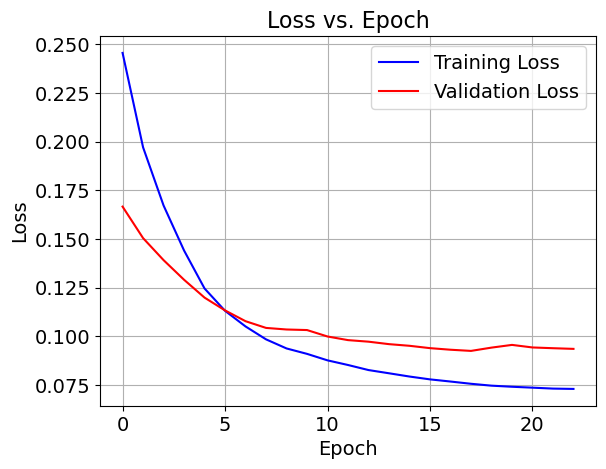

In [981]:
# Plot the loss vs. epochs of training
import matplotlib.pyplot as plt

epochs = range(len(model_history.history['val_loss']))

fig, ax = plt.subplots()
plt.plot(epochs, model_history.history["loss"], 'b', label='Training Loss')
plt.plot(epochs, model_history.history["val_loss"], 'r', label='Validation Loss')
plt.title("Loss vs. Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)

# Increase font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=14)

# plt.savefig("/Users/seungbinjoo/Desktop/loss_vs_epoch_plot.png", dpi=500)  # You can change the format and resolution as needed

plt.show()

In [982]:
# plt.savefig("/Users/seungbinjoo/Desktop/loss_vs_epoch_plot.png", dpi=500)  # You can change the format and resolution as needed

In [983]:
plt.close()

Actual vs. predicted graph

In [984]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


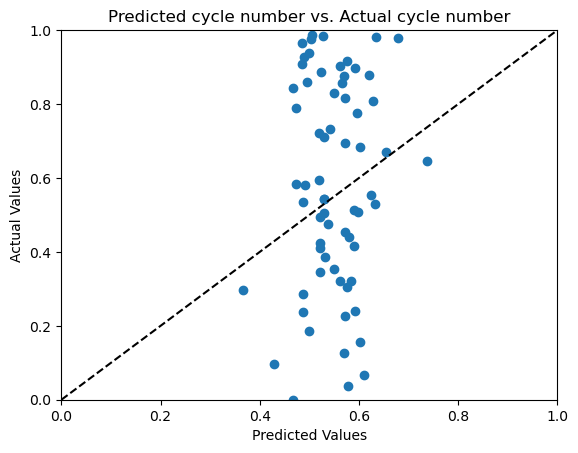

In [985]:
# Create a residuals plot
plt.scatter(y_pred, y_test)
plt.plot([0, 100], [0, 100], '--k', label='y=x')  # Add y=x line
plt.title('Predicted cycle number vs. Actual cycle number')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [986]:
y_mean = np.mean(y_test)

TSS = np.sum((y_test - y_mean)**2)
RSS = np.sum((y_test - y_pred)**2)

r_squared = 1 - (RSS / TSS)

print("R-squared value:", r_squared)

R-squared value: -82.49615958175508


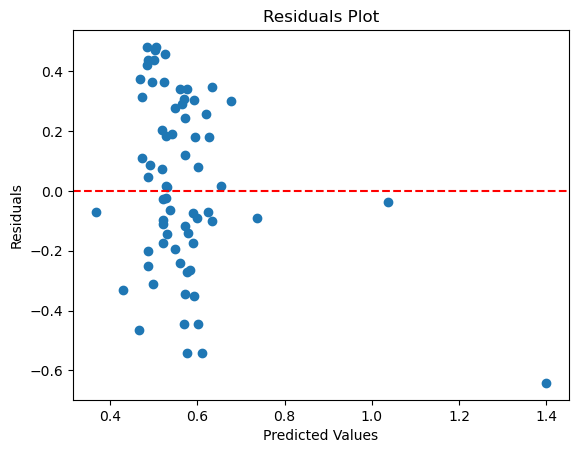

In [987]:
# Assuming 'y_actual' is the actual target values and 'y_pred' is the predicted values
residuals = y_test.flatten() - y_pred.flatten()

# Create a residuals plot
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

Poor results with the neural network regression model.

# 3. Regression Using 1D Convolutional Neural Networks (Predicting Cycle Number)

Below image shows an example 1D CNN configuration with 3 CNN and 2 MLP layers.

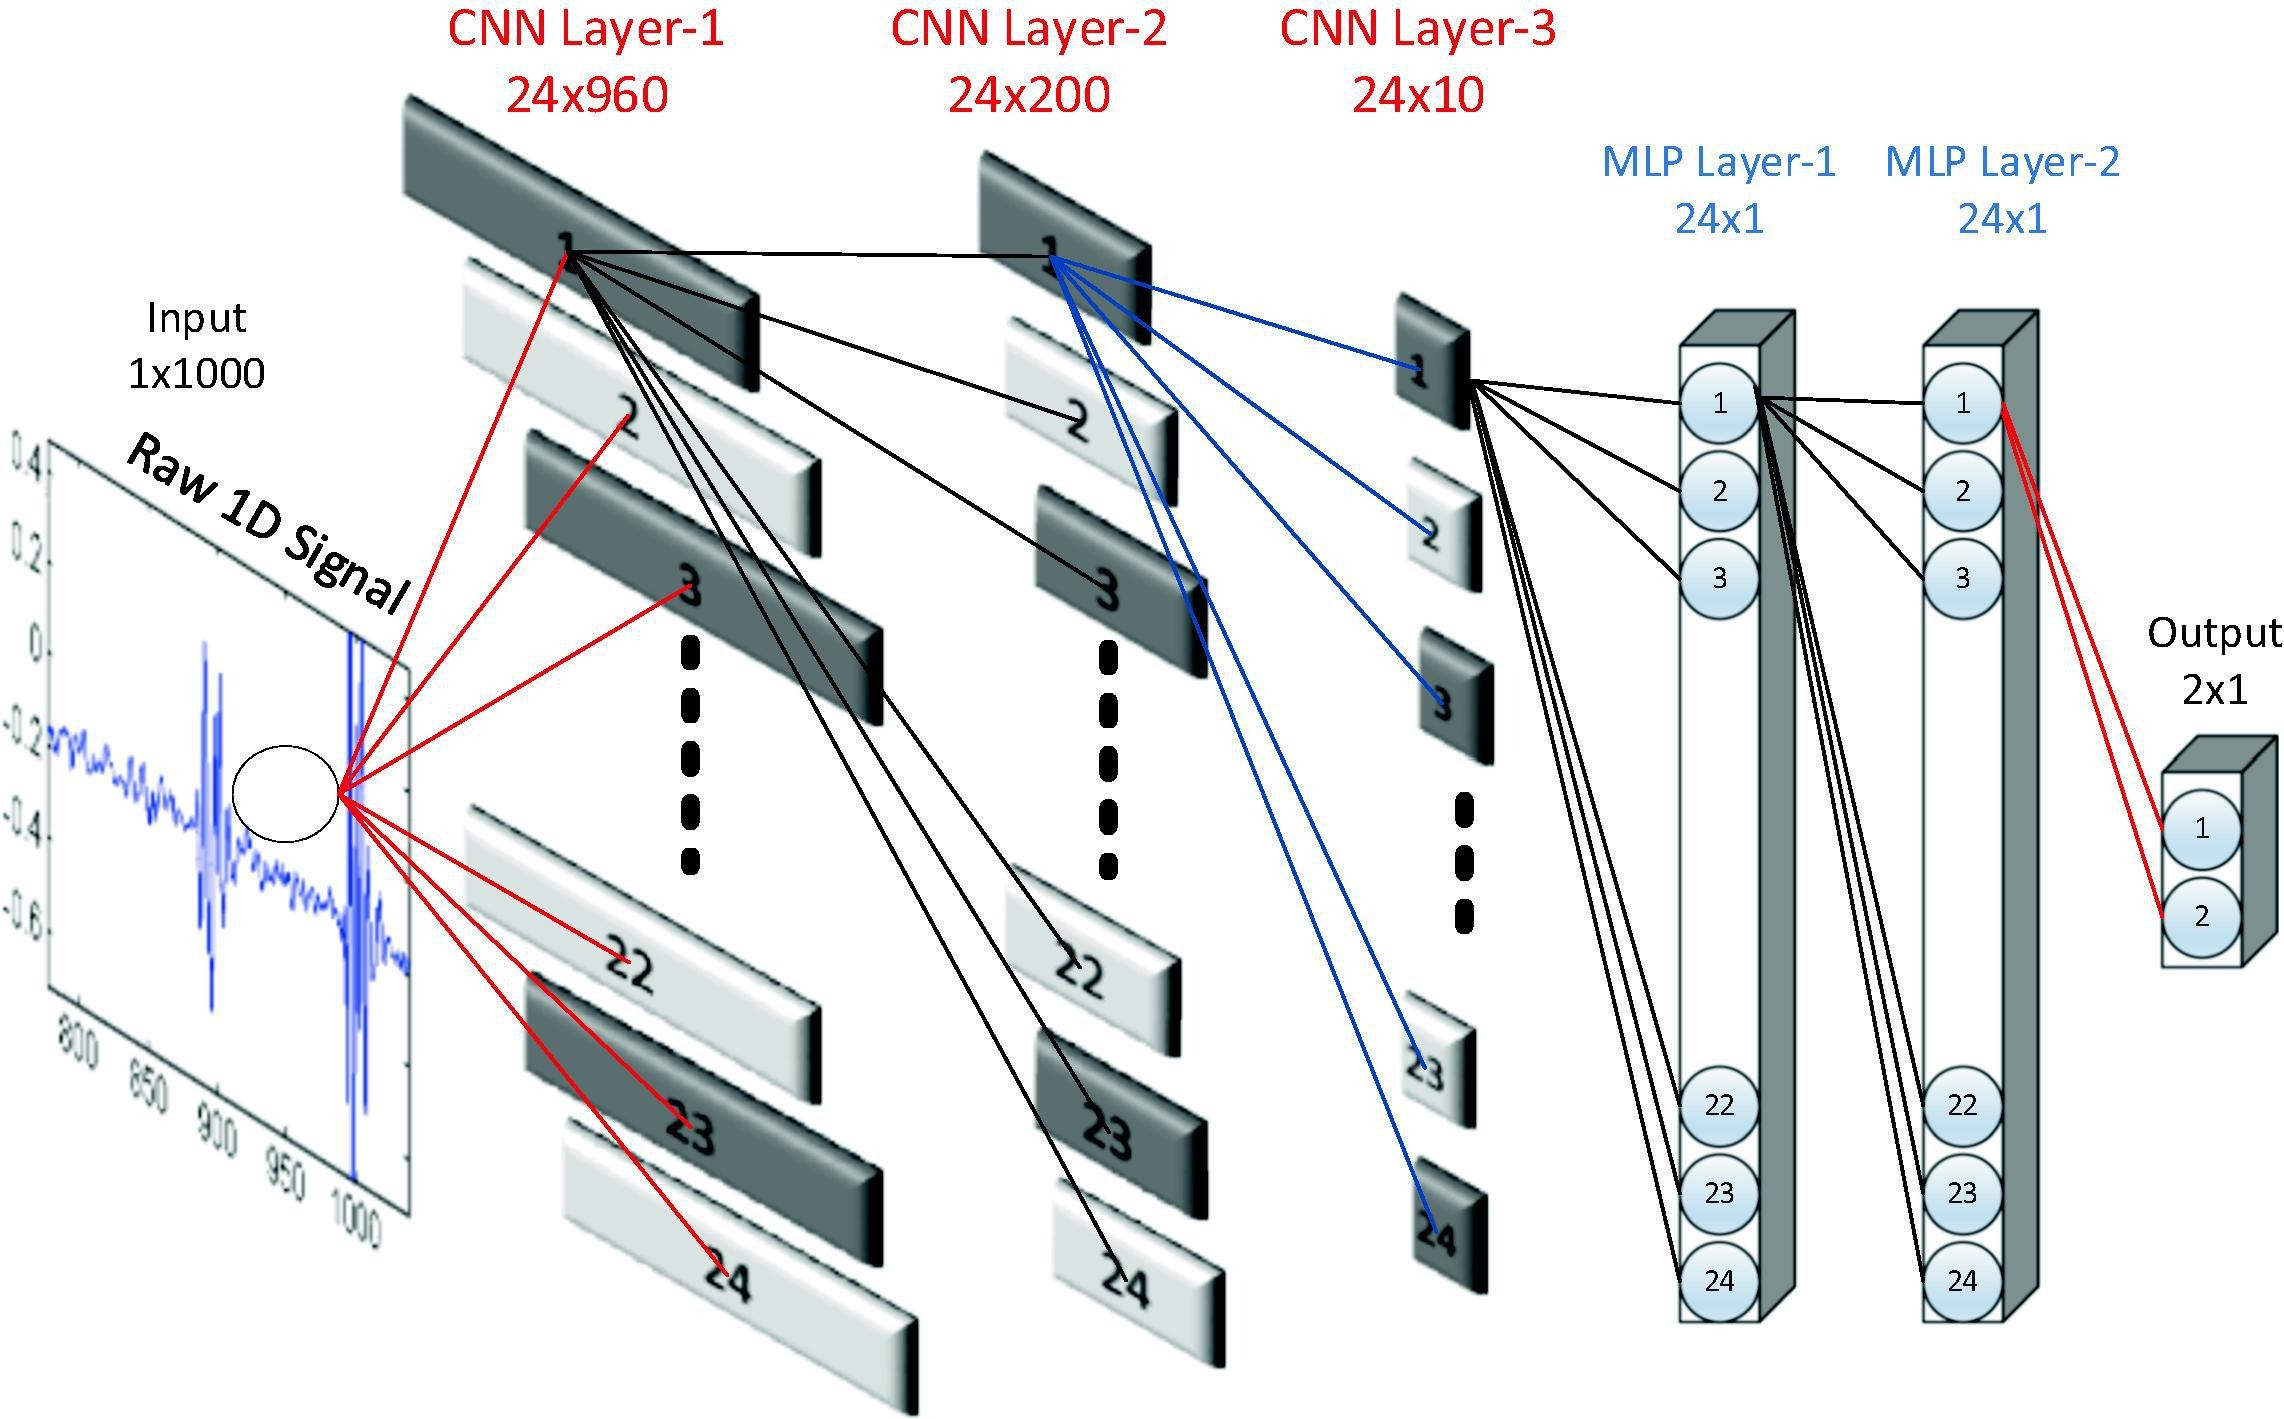

Preprocessing:


Each waveform has 14 associated parameters (used as features for the machine learning model), such as peak amplitude, average frequency, etc. However, we can also just take the time domain signal of each waveform (2048 data points for each waveform) and feed that into a 1D CNN.

In order to do this, we need to:
1. Make a csv file where each row corresponds to an AE hit waveform and each column represents voltage at a certain point in time data
2. Access each unfiltered waveform csv file, extract the voltage data from the second column
3. Reshape this column into a row.
4. Then insert this row into the csv file made in step 1.
5. Repeat for all unfiltered waveforms (at different C-rates, different transducer positions, etc).

Note: CNN regression was attempted with both time-domain raw waveform data and FFT data. Both did not work.

In [988]:
import csv
import os
from pandas import *

# Initialise
header = []

# Make a column for each voltage value in point of time
for i in range(2048):
    header.append('t=' + str(i*0.2))
    i += 1

# Name of csv file
filename = 'aged_cell_FFT_long_term_data.csv'

# List of experiment folders which contains waveforms that we want to feed into our ML model. Note: folder list needs to be in the same order as the way we organized the acoustic_hits dataframe
folders = ['/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/5 Experiments/Long Term Cycling Experiments/Aged Cell']

# Writing to csv file
with open(filename,'w') as csvfile:
    
    # Create a csv writer object
    csvwriter = csv.writer(csvfile)
    
    # Writing the header
    csvwriter.writerow(header)
    
    # Nested for loop
    # Accessing each experiment folder
    for folder in folders:
        waveform_folders_dir = os.path.join(folder, 'Waveforms Processed')
        waveform_folders = [f for f in os.listdir(waveform_folders_dir) if f != '.DS_Store']
        waveform_folders.sort()
        
        # Accessing each transducer position folder in each experiment folder + accessing unfiltered waveform folder
        for waveform_folder in waveform_folders:
            csv_folder_dir = os.path.join(waveform_folders_dir, waveform_folder)
            csv_folder = os.path.join(csv_folder_dir, 'Unfiltered Waveform')
            csv_files = [f for f in os.listdir(csv_folder) if f.endswith('.csv') and f != '.DS_Store']
            csv_files.sort()
            
            # Accessing each waveform csv file in each unfiltered waveform folder
            for csv_file in csv_files:
                
                # Full file path to particular csv file
                csv_file_path = os.path.join(csv_folder, csv_file)
                
                # Read voltage data from csv into a list
                data = read_csv(csv_file_path)
                voltage_data = data['Voltage (V)'].tolist()
                
                # Write voltage data to our target csv file
                csvwriter.writerow(voltage_data)


In [989]:
acoustic_waveforms = pd.read_csv('/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/2 Code/My code/aged_cell_FFT_long_term_data.csv', delimiter =',')
acoustic_waveforms

,t=0.0,t=0.2,t=0.4,t=0.6000000000000001,t=0.8,t=1.0,t=1.2000000000000002,t=1.4000000000000001,t=1.6,t=1.8,...,t=407.6,t=407.8,t=408.0,t=408.20000000000005,t=408.40000000000003,t=408.6,t=408.8,t=409.0,t=409.20000000000005,t=409.40000000000003
0,0.000000,-0.000305,-0.000305,-0.000305,-0.000305,0.000000,0.000305,0.000305,0.000610,0.000305,...,-0.000610,-0.000610,-0.000305,-0.000305,-0.000305,-0.000305,-0.000305,0.000305,0.000305,-0.000305
1,-0.000305,-0.000305,-0.000610,-0.000610,-0.000305,-0.000610,-0.000610,-0.000610,-0.000305,0.000000,...,-0.000305,-0.000610,-0.000305,-0.000305,-0.000610,-0.000305,0.000000,0.000000,0.000000,0.000000
2,-0.000610,0.000000,0.000000,0.000000,-0.000305,-0.000305,-0.000305,0.000000,-0.000305,-0.000305,...,0.000305,0.000000,-0.000305,-0.000305,-0.000305,0.000000,0.000000,0.000305,0.000000,0.000000
3,-0.000610,-0.000610,-0.000610,-0.000610,-0.000610,-0.000610,-0.000610,0.000000,0.000000,-0.000305,...,0.000305,0.000305,-0.000305,-0.000305,0.000000,0.000000,-0.000305,0.000000,-0.000305,-0.000305
4,-0.000305,-0.001221,-0.001526,-0.001526,-0.000916,-0.000305,-0.000916,-0.001221,-0.001526,-0.001831,...,0.000000,0.000000,0.000610,0.000610,0.000305,0.000000,0.000000,0.000000,0.000610,0.000916
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.000000,0.000000,0.000305,0.000305,0.000305,-0.000305,0.000000,-0.000305,-0.000305,-0.000305,...,-0.000916,-0.000916,-0.000916,-0.000916,-0.000610,-0.000610,-0.000916,-0.000305,-0.000305,-0.000305
332,-0.000305,-0.000305,0.000000,0.000305,0.000305,0.000000,0.000305,0.000610,0.000305,0.000305,...,0.000000,0.000305,0.000305,0.000000,-0.000305,-0.000610,-0.000610,-0.000305,-0.000305,0.000000
333,-0.000610,-0.000916,-0.000916,-0.000610,-0.000916,-0.000916,-0.000610,-0.000610,-0.000916,-0.000916,...,0.000000,-0.000305,0.000305,0.000916,0.000610,0.000000,0.000000,0.000000,0.000000,-0.000305
334,-0.001221,-0.000916,-0.000610,-0.000305,-0.000916,-0.001221,-0.000916,-0.000610,-0.000305,0.000000,...,0.000610,0.000610,0.000610,0.000610,0.000610,0.000610,0.000916,0.000916,0.000916,0.000610


Sanity check: 336 waveforms for aged cell long term cycling and each waveform has 2048 points in the time domain.

In [990]:
# Function to apply FFT to each row and keep only the magnitude
def apply_fft_magnitude(row):
    fft_result = np.fft.fft(row)
    magnitude = np.abs(fft_result)
    return pd.Series(magnitude)

# Apply the function to each row
waveforms_fft_magnitude = acoustic_waveforms.apply(apply_fft_magnitude, axis=1)

# Rename the columns for clarity
waveforms_fft_magnitude.columns = [f'FFT_magnitude_{i}' for i in range(len(waveforms_fft_magnitude.columns))]

waveforms_fft_magnitude

,FFT_magnitude_0,FFT_magnitude_1,FFT_magnitude_2,FFT_magnitude_3,FFT_magnitude_4,FFT_magnitude_5,FFT_magnitude_6,FFT_magnitude_7,FFT_magnitude_8,FFT_magnitude_9,...,FFT_magnitude_2038,FFT_magnitude_2039,FFT_magnitude_2040,FFT_magnitude_2041,FFT_magnitude_2042,FFT_magnitude_2043,FFT_magnitude_2044,FFT_magnitude_2045,FFT_magnitude_2046,FFT_magnitude_2047
0,0.386353,0.207743,0.057878,0.037275,0.082287,0.067431,0.044679,0.037602,0.100242,0.035299,...,0.141268,0.035299,0.100242,0.037602,0.044679,0.067431,0.082287,0.037275,0.057878,0.207743
1,0.602724,0.171991,0.053984,0.049703,0.103180,0.080663,0.039627,0.022989,0.157985,0.099240,...,0.116903,0.099240,0.157985,0.022989,0.039627,0.080663,0.103180,0.049703,0.053984,0.171991
2,0.505372,0.078286,0.036689,0.022092,0.049188,0.061489,0.048767,0.031557,0.051838,0.110846,...,0.018978,0.110846,0.051838,0.031557,0.048767,0.061489,0.049188,0.022092,0.036689,0.078286
3,0.762941,0.283293,0.025020,0.042621,0.107593,0.082308,0.084285,0.083281,0.233765,0.175968,...,0.208171,0.175968,0.233765,0.083281,0.084285,0.082308,0.107593,0.042621,0.025020,0.283293
4,0.498657,0.751594,0.250743,0.154832,0.144887,0.081508,0.138164,0.122865,0.024268,0.065242,...,0.077921,0.065242,0.024268,0.122865,0.138164,0.081508,0.144887,0.154832,0.250743,0.751594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.420533,0.339801,0.093424,0.044121,0.046366,0.022393,0.059740,0.020076,0.024104,0.081369,...,0.040956,0.081369,0.024104,0.020076,0.059740,0.022393,0.046366,0.044121,0.093424,0.339801
332,0.163269,0.185038,0.072774,0.078075,0.068132,0.058934,0.015633,0.075627,0.101727,0.053858,...,0.025697,0.053858,0.101727,0.075627,0.015633,0.058934,0.068132,0.078075,0.072774,0.185038
333,0.221557,0.859659,0.241419,0.157800,0.112821,0.117608,0.071786,0.084691,0.083088,0.152977,...,0.034431,0.152977,0.083088,0.084691,0.071786,0.117608,0.112821,0.157800,0.241419,0.859659
334,0.755920,0.723538,0.238258,0.141924,0.114885,0.078744,0.117084,0.069453,0.101023,0.083936,...,0.078616,0.083936,0.101023,0.069453,0.117084,0.078744,0.114885,0.141924,0.238258,0.723538


In [991]:
downsampled_data = waveforms_fft_magnitude.iloc[:, ::2]

In [992]:
downsampled_data

,FFT_magnitude_0,FFT_magnitude_2,FFT_magnitude_4,FFT_magnitude_6,FFT_magnitude_8,FFT_magnitude_10,FFT_magnitude_12,FFT_magnitude_14,FFT_magnitude_16,FFT_magnitude_18,...,FFT_magnitude_2028,FFT_magnitude_2030,FFT_magnitude_2032,FFT_magnitude_2034,FFT_magnitude_2036,FFT_magnitude_2038,FFT_magnitude_2040,FFT_magnitude_2042,FFT_magnitude_2044,FFT_magnitude_2046
0,0.386353,0.057878,0.082287,0.044679,0.100242,0.141268,0.081493,0.090288,0.046448,0.015800,...,0.043368,0.015800,0.046448,0.090288,0.081493,0.141268,0.100242,0.044679,0.082287,0.057878
1,0.602724,0.053984,0.103180,0.039627,0.157985,0.116903,0.111198,0.225035,0.253262,0.096911,...,0.185212,0.096911,0.253262,0.225035,0.111198,0.116903,0.157985,0.039627,0.103180,0.053984
2,0.505372,0.036689,0.049188,0.048767,0.051838,0.018978,0.020419,0.121873,0.082053,0.054517,...,0.073963,0.054517,0.082053,0.121873,0.020419,0.018978,0.051838,0.048767,0.049188,0.036689
3,0.762941,0.025020,0.107593,0.084285,0.233765,0.208171,0.198370,0.289142,0.268935,0.243758,...,0.155766,0.243758,0.268935,0.289142,0.198370,0.208171,0.233765,0.084285,0.107593,0.025020
4,0.498657,0.250743,0.144887,0.138164,0.024268,0.077921,0.093525,0.114283,0.037634,0.045059,...,0.052711,0.045059,0.037634,0.114283,0.093525,0.077921,0.024268,0.138164,0.144887,0.250743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.420533,0.093424,0.046366,0.059740,0.024104,0.040956,0.086013,0.075037,0.110048,0.051452,...,0.054356,0.051452,0.110048,0.075037,0.086013,0.040956,0.024104,0.059740,0.046366,0.093424
332,0.163269,0.072774,0.068132,0.015633,0.101727,0.025697,0.242479,0.179028,0.090117,0.090395,...,0.126031,0.090395,0.090117,0.179028,0.242479,0.025697,0.101727,0.015633,0.068132,0.072774
333,0.221557,0.241419,0.112821,0.071786,0.083088,0.034431,0.088542,0.103381,0.044142,0.012025,...,0.136952,0.012025,0.044142,0.103381,0.088542,0.034431,0.083088,0.071786,0.112821,0.241419
334,0.755920,0.238258,0.114885,0.117084,0.101023,0.078616,0.076683,0.026406,0.032606,0.031407,...,0.057927,0.031407,0.032606,0.026406,0.076683,0.078616,0.101023,0.117084,0.114885,0.238258


In [993]:
# Use StandardScaler to standardize the features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(downsampled_data)

In [994]:
# set aside 20% of train and test data for evaluation
from sklearn.model_selection import train_test_split

# The shuffle function randomly changes the order of the various rows.
# Finally, the random_state initializes the seed for the random function used to split the dataset.
# Setting the random state allows the experiment to be easily reproduced and ensures results within the same parameters.
X_train, X_test, y_train, y_test = train_test_split(scaled_data, reg_targets,
    test_size=0.2, shuffle = True, random_state = 8)

In [995]:
# create deep learning model
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Define the model architecture
model = tf.keras.Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(1024, 1)),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.25),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='linear')
])

model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

Model: "sequential_71"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_79 (Conv1D)          (None, 1022, 32)          128       
                                                                 
 max_pooling1d_73 (MaxPoolin  (None, 511, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_80 (Conv1D)          (None, 509, 64)           6208      
                                                                 
 max_pooling1d_74 (MaxPoolin  (None, 254, 64)          0         
 g1D)                                                            
                                                                 
 dropout_60 (Dropout)        (None, 254, 64)           0         
                                                                 
 flatten_33 (Flatten)        (None, 16256)           

In [996]:
# Train the classifier
from keras.callbacks import EarlyStopping

early_stopping3 = EarlyStopping(monitor='val_loss', patience=200)
model_history = model.fit(X_train, y_train, epochs=1000, batch_size=32, verbose=1,validation_split=0.2, callbacks=[early_stopping3])

Epoch 1/1000
7/7 [==============================] - 1s 91ms/step - loss: 2402.2810 - mse: 2402.2810 - val_loss: 1432.5193 - val_mse: 1432.5193
Epoch 2/1000
7/7 [==============================] - 0s 51ms/step - loss: 1238.7030 - mse: 1238.7030 - val_loss: 974.8910 - val_mse: 974.8910
Epoch 3/1000
7/7 [==============================] - 0s 53ms/step - loss: 1089.6572 - mse: 1089.6572 - val_loss: 948.0416 - val_mse: 948.0416
Epoch 4/1000
7/7 [==============================] - 0s 48ms/step - loss: 918.9177 - mse: 918.9177 - val_loss: 1120.2997 - val_mse: 1120.2997
Epoch 5/1000
7/7 [==============================] - 0s 48ms/step - loss: 1080.0850 - mse: 1080.0850 - val_loss: 1059.6908 - val_mse: 1059.6908
Epoch 6/1000
7/7 [==============================] - 0s 63ms/step - loss: 931.6366 - mse: 931.6366 - val_loss: 922.6095 - val_mse: 922.6095
Epoch 7/1000
7/7 [==============================] - 0s 60ms/step - loss: 963.2574 - mse: 963.2574 - val_loss: 976.2283 - val_mse: 976.2283
Epoch 8/1000


Epoch 59/1000
7/7 [==============================] - 0s 48ms/step - loss: 205.3466 - mse: 205.3466 - val_loss: 1146.5186 - val_mse: 1146.5186
Epoch 60/1000
7/7 [==============================] - 0s 52ms/step - loss: 150.8439 - mse: 150.8439 - val_loss: 1088.5623 - val_mse: 1088.5623
Epoch 61/1000
7/7 [==============================] - 0s 49ms/step - loss: 188.3709 - mse: 188.3709 - val_loss: 1133.6801 - val_mse: 1133.6802
Epoch 62/1000
7/7 [==============================] - 0s 48ms/step - loss: 165.6170 - mse: 165.6170 - val_loss: 1095.6954 - val_mse: 1095.6954
Epoch 63/1000
7/7 [==============================] - 0s 48ms/step - loss: 197.9650 - mse: 197.9650 - val_loss: 1155.5393 - val_mse: 1155.5393
Epoch 64/1000
7/7 [==============================] - 0s 49ms/step - loss: 245.6321 - mse: 245.6321 - val_loss: 1140.4663 - val_mse: 1140.4663
Epoch 65/1000
7/7 [==============================] - 0s 49ms/step - loss: 179.4158 - mse: 179.4158 - val_loss: 1094.1541 - val_mse: 1094.1541
Epoch 

7/7 [==============================] - 0s 46ms/step - loss: 160.5412 - mse: 160.5412 - val_loss: 1126.7883 - val_mse: 1126.7883
Epoch 117/1000
7/7 [==============================] - 0s 46ms/step - loss: 167.4862 - mse: 167.4862 - val_loss: 1104.8766 - val_mse: 1104.8766
Epoch 118/1000
7/7 [==============================] - 0s 46ms/step - loss: 176.1949 - mse: 176.1949 - val_loss: 1110.8938 - val_mse: 1110.8938
Epoch 119/1000
7/7 [==============================] - 0s 44ms/step - loss: 201.4369 - mse: 201.4369 - val_loss: 1128.4360 - val_mse: 1128.4360
Epoch 120/1000
7/7 [==============================] - 0s 46ms/step - loss: 175.9068 - mse: 175.9068 - val_loss: 1107.6785 - val_mse: 1107.6785
Epoch 121/1000
7/7 [==============================] - 0s 46ms/step - loss: 192.0294 - mse: 192.0294 - val_loss: 1127.8807 - val_mse: 1127.8807
Epoch 122/1000
7/7 [==============================] - 0s 54ms/step - loss: 170.5049 - mse: 170.5049 - val_loss: 1104.4374 - val_mse: 1104.4374
Epoch 123/1000

7/7 [==============================] - 0s 56ms/step - loss: 206.7816 - mse: 206.7816 - val_loss: 1079.0067 - val_mse: 1079.0067
Epoch 174/1000
7/7 [==============================] - 1s 65ms/step - loss: 151.1592 - mse: 151.1592 - val_loss: 1121.5201 - val_mse: 1121.5201
Epoch 175/1000
7/7 [==============================] - 0s 58ms/step - loss: 183.3561 - mse: 183.3561 - val_loss: 1073.6859 - val_mse: 1073.6859
Epoch 176/1000
7/7 [==============================] - 0s 60ms/step - loss: 142.5987 - mse: 142.5987 - val_loss: 1091.6846 - val_mse: 1091.6846
Epoch 177/1000
7/7 [==============================] - 0s 51ms/step - loss: 157.6092 - mse: 157.6092 - val_loss: 1055.9888 - val_mse: 1055.9888
Epoch 178/1000
7/7 [==============================] - 0s 45ms/step - loss: 158.4547 - mse: 158.4547 - val_loss: 1085.7263 - val_mse: 1085.7263
Epoch 179/1000
7/7 [==============================] - 0s 52ms/step - loss: 151.0397 - mse: 151.0397 - val_loss: 1040.4849 - val_mse: 1040.4849
Epoch 180/1000

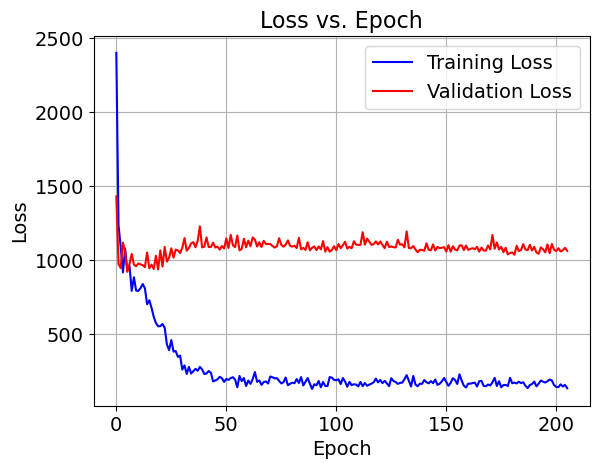

In [997]:
# Plot the loss vs. epochs of training
import matplotlib.pyplot as plt

epochs = range(len(model_history.history['val_loss']))

fig, ax = plt.subplots()
plt.plot(epochs, model_history.history["loss"], 'b', label='Training Loss')
plt.plot(epochs, model_history.history["val_loss"], 'r', label='Validation Loss')
plt.title("Loss vs. Epoch", fontsize=16)
plt.ylabel("Loss", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.grid(True)
plt.legend(fontsize=14)

# Increase font size for tick labels
ax.tick_params(axis='both', which='major', labelsize=14)

# plt.savefig("/Users/seungbinjoo/Desktop/loss_vs_epoch_plot.png", dpi=500)  # You can change the format and resolution as needed

plt.show()

In [998]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 10ms/step


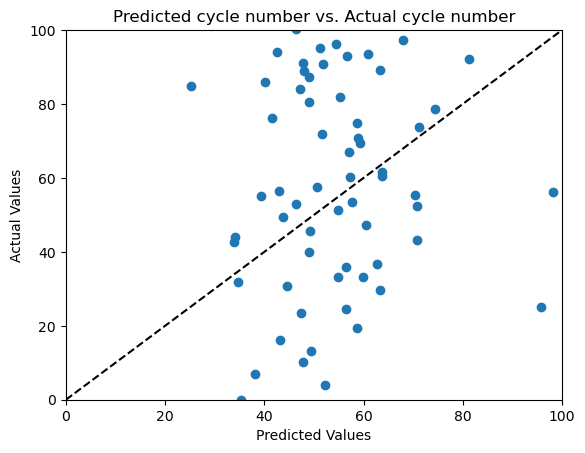

In [999]:
# Create a residuals plot
plt.scatter(y_pred, y_test)
plt.plot([0, 100], [0, 100], '--k', label='y=x')  # Add y=x line
plt.title('Predicted cycle number vs. Actual cycle number')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [1000]:
y_mean = np.mean(y_test)

TSS = np.sum((y_test - y_mean)**2)
RSS = np.sum((y_test - y_pred)**2)

r_squared = 1 - (RSS / TSS)

print("R-squared value:", r_squared)

R-squared value: -0.20966985244212344


# 4. Unsupervised Learning with Long Term Cycling Data

In [1074]:
import pandas as pd
import numpy as np
data = pd.read_csv('/Users/seungbinjoo/Desktop/UCL FUSE Internship/Work/5 Experiments/Long Term Cycling Experiments/Machine Learning Files/Preprocessing for regression model/Aged Hits with targets.csv', delimiter =',')

In [1075]:
data

,Waveform Number,Rise Time,Counts to Peak,Energy,Duration,Amplitude,Average Frequency,RMS,ASL,PCNTS,Threshold,Reverberation Frequency,Initiation Frequency,Signal Strength,Absolute Energy,Classification,Cycle Number (Regression target)
0,1,1794,66,9,4538,37,14,0.0004,16,25,29,15,13,59300.0,146.000,Aged,0.000000
1,2,1771,145,28,7718,42,18,0.0006,18,43,29,18,24,178000.0,767.000,Aged,0.000000
2,3,1771,1,28,7718,27,0,0.0006,18,1,29,1,0,178000.0,767.000,Aged,0.000000
3,4,30,3,0,50,34,60,0.0004,16,3,29,1,100,1100.0,3.520,Aged,0.002778
4,5,2,1,0,2,30,500,0.0004,16,1,29,1000,500,42.7,0.114,Aged,0.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,336,25,3,0,67,31,44,0.0004,16,2,29,24,80,702.0,1.300,Aged,102.425000
336,337,25,1,0,67,27,14,0.0004,16,1,29,1,40,702.0,1.300,Aged,102.494444
337,338,25,1,0,67,27,14,0.0004,16,1,29,1,40,702.0,1.300,Aged,103.383333
338,339,46,2,0,50,33,40,0.0004,16,2,29,1,43,881.0,2.420,Aged,103.763889


In [1076]:
data = data.drop(range(4))

In [1077]:
reg_targets = data['Cycle Number (Regression target)']

In [1078]:
# get rid of columns we don't need
data.drop(['Waveform Number', 'Classification', 'Cycle Number (Regression target)'], inplace=True, axis=1)

In [1079]:
# Use StandardScaler to standardize the features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_acoustic_hits = std_scaler.fit_transform(data)

In [1080]:
# Displaying the scaled data
scaled_acoustic_hits

array([[-0.22212933, -0.21135425, -0.07738232, ...,  0.12348319,
        -0.40237958, -0.4240737 ],
       [-0.12998679, -0.21135425, -0.07738232, ..., -0.51993771,
        -0.32763339, -0.36664394],
       [-0.12998679, -0.21135425, -0.07738232, ..., -0.51993771,
        -0.32763339, -0.36664394],
       ...,
       [ 0.83750983, -0.21135425, -0.07738232, ..., -1.06041127,
         0.67360652,  0.10804896],
       [ 1.80500645,  1.52071958, -0.07738232, ..., -1.05269021,
         0.96573682,  0.6105594 ],
       [ 0.92965236,  3.2527934 , -0.07738232, ..., -0.97290602,
         0.62791016,  0.18432286]])

In [1081]:
# Shape of the array should be as expected
print(scaled_acoustic_hits.shape)

(336, 14)


In [1082]:
# Compute covariance and apply eigendecomposition using PCA library from Scikit Learn
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # We want to reduce dimensionality to 3
acoustic_hits_reduced = pca.fit_transform(scaled_acoustic_hits) # Fit the model with data and apply the dimensionality reduction on data
acoustic_hits_reduced # display our dataset which has been transformed into 3 dimensions

array([[-0.9682462 ,  0.83875642,  0.05825484],
       [-0.61952043,  0.17485421, -0.06599143],
       [-0.67035955,  0.34403434,  0.90873025],
       ...,
       [ 1.70633461, -1.06225627,  1.26589735],
       [ 3.5045501 , -0.35977571, -1.46186091],
       [ 3.21156376, -0.01616571, -1.97123115]])

In [1083]:
# explained_variance_ratio_ attribute captures the ratio of the total variance each principal component captures.
# So we can sum up the ratios to get the total variance in the chosen number of components.
print(sum(pca.explained_variance_ratio_))

0.8339002471454953


<IPython.core.display.Javascript object>


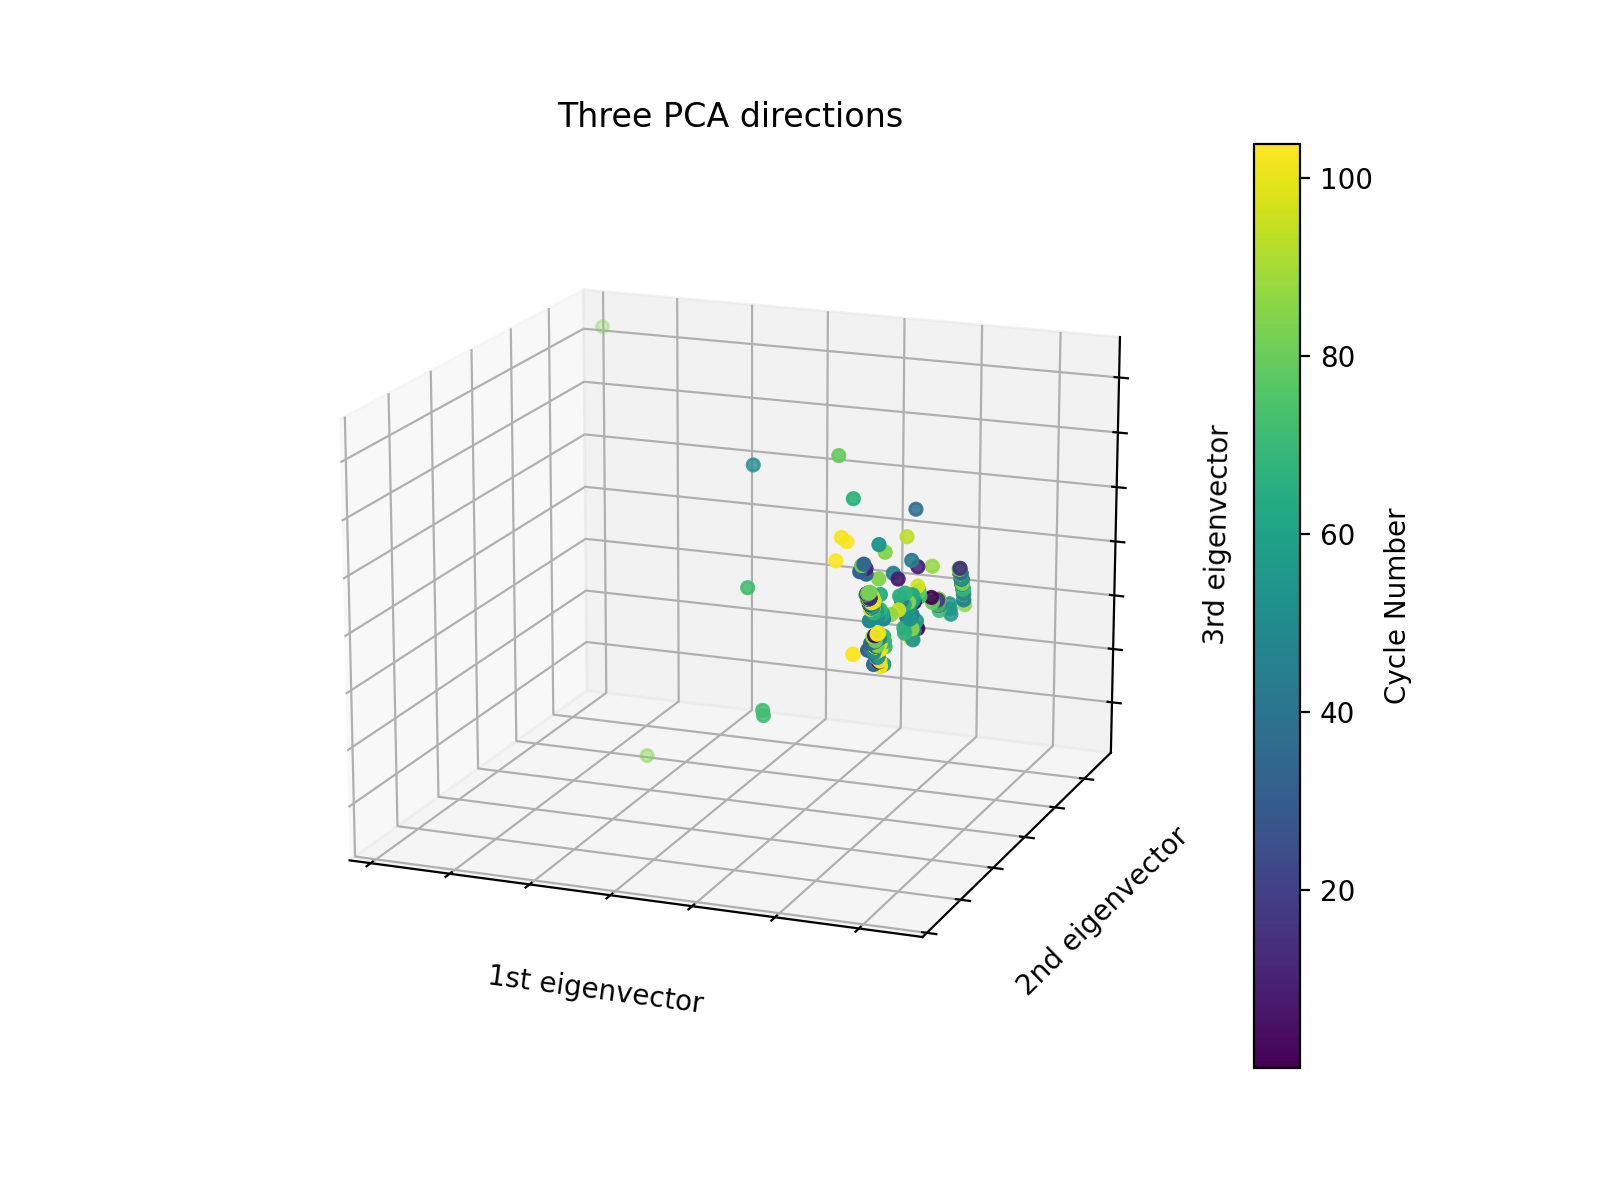

In [1084]:
# Visualizing the three principal components and how our transformed data set points map onto that space
%matplotlib notebook

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from mpl_toolkits.mplot3d import Axes3D

fig1 = plt.figure(1, figsize=(8,6))
ax1 = fig1.add_subplot(111, projection="3d", elev=-150, azim=110)

# Add the c parameter to scatter, specifying color based on reg_targets
scatter = ax1.scatter(
    acoustic_hits_reduced[:,0],
    acoustic_hits_reduced[:,1],
    acoustic_hits_reduced[:,2],
    c=reg_targets,  # Use reg_targets for color
    cmap=plt.cm.viridis  # Choose a colormap (you can change it to any colormap you prefer)
)

# Add a colorbar for reference
cbar = fig1.colorbar(scatter)
cbar.set_label('Cycle Number')

ax1.set_title("Three PCA directions")
ax1.set_xlabel("1st eigenvector")
ax1.xaxis.set_ticklabels([])
ax1.set_ylabel("2nd eigenvector")
ax1.yaxis.set_ticklabels([])
ax1.set_zlabel("3rd eigenvector")
ax1.zaxis.set_ticklabels([])

plt.show()

# If plot is not plotting check maplotlib backend
# import matplotlib
# print(matplotlib.get_backend())

In [1085]:
plt.close()

In [1086]:
# Trying k-mean clustering
from sklearn.cluster import KMeans

# n_init:
# Number of times the k-means algorithm is run with different centroid seeds.
# The final results is the best output of n_init consecutive runs in terms of inertia.
# n_init= 'auto': the number of runs depends on the value of init:
# random_state: Determines random number generation for centroid initialization. Use an int to make the randomness deterministic.

kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto') # set up algorithm
hits_clusters = kmeans.fit(acoustic_hits_reduced) # fit data using model
labels = hits_clusters.labels_ # get labels from clustering analysis

<IPython.core.display.Javascript object>


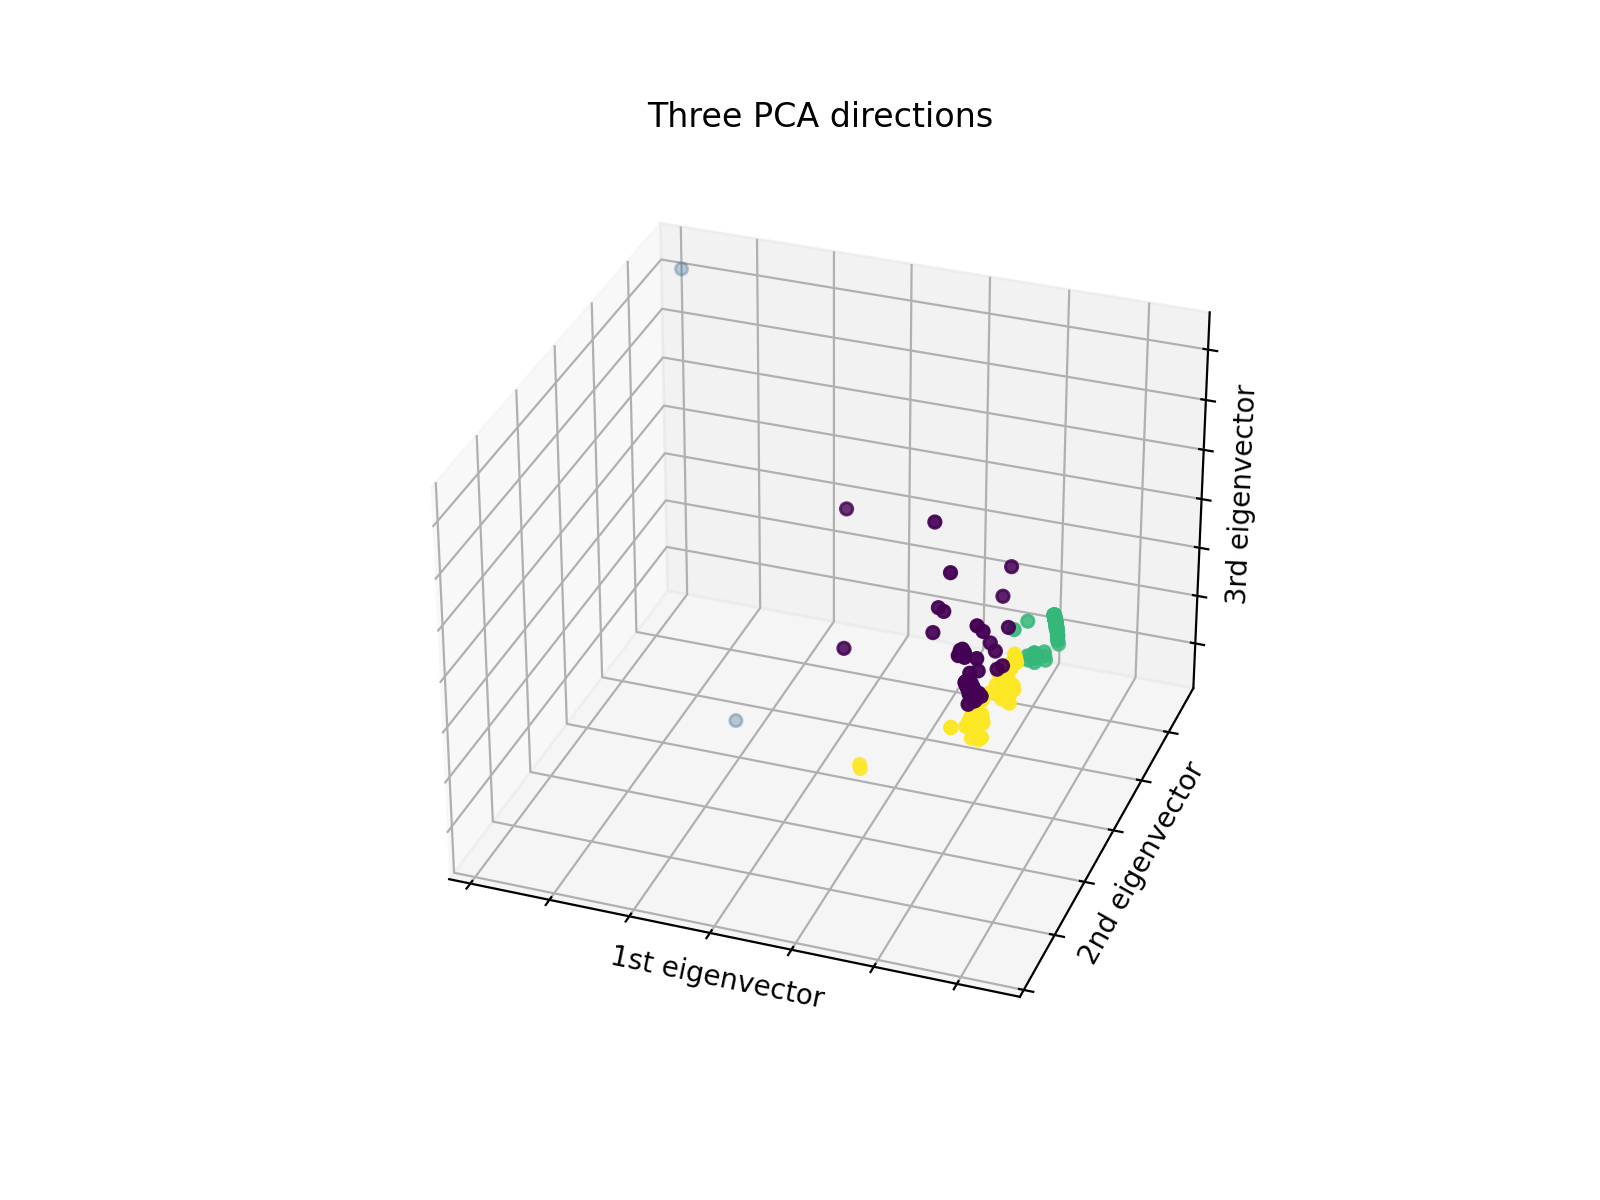

In [1087]:
# Create proxy artists for the legend based on cluster labels
proxy_artists = []
for label in range(4):  # Assuming you have 4 clusters
    color = plt.cm.tab10(label / 4.0)  # Use the same color mapping as the scatter plot
    proxy_artists.append(plt.Line2D([0], [0], linestyle='none', marker='o', markersize=8, markerfacecolor=color, label=f'Cluster {label}'))


# Plot the figure
fig2 = plt.figure(2, figsize=(8,6))
ax2 = fig2.add_subplot(111, projection="3d", elev=-150, azim=110)
ax2.scatter(
    acoustic_hits_reduced[:,0],
    acoustic_hits_reduced[:,1],
    acoustic_hits_reduced[:,2],
    c=labels.astype(float))

ax2.set_title("Three PCA directions")
ax2.set_xlabel("1st eigenvector")
ax2.xaxis.labelpad = -11  # Decrease the space between x-axis label and axis
ax2.xaxis.set_ticklabels([])

ax2.set_ylabel("2nd eigenvector")
ax2.yaxis.set_ticklabels([])
ax2.yaxis.labelpad = -11  # Decrease the space between y-axis label and axis

ax2.set_zlabel("3rd eigenvector")
ax2.zaxis.set_ticklabels([])
ax2.zaxis.labelpad = -11  # Decrease the space between z-axis label and axis

# ax2.legend(handles=proxy_artists)

plt.show()

In [1088]:
plt.close()

Autoencoder model:

In [1129]:
# Rename dataset
x_train = scaled_acoustic_hits

# Check that shape of the array is what we expect
print(x_train.shape)

(336, 14)


In [1130]:
# Building the encoder and decoder

# Dimension of our original input space
input_dim = 14

# Dimension of our latent space (encoding space, i.e. bottleneck)
latent_dim = 5

# ENCODER
# "The sequential model allows us to specify a neural network, precisely, sequential: from input to output,
# passing through a series of neural layers, one after the other."
encoder = Sequential([
    
    # Define layers of the neural network (nodes, activation function)
    Dense(11, activation='relu', input_shape=(input_dim,)),
    Dense(8, activation='relu'),
    Dense(latent_dim, activation='relu')
])

# DECODER
decoder = Sequential([
    Dense(8, activation='relu', input_shape=(latent_dim,)),
    Dense(11, activation='relu'),
    Dense(input_dim, activation=None)
])

In [1131]:
# Combine encoder and decoder to build the autoencoder
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))

# Using MSE loss function and adam optimiser
autoencoder.compile(loss='mse', optimizer='adam')

<IPython.core.display.Javascript object>


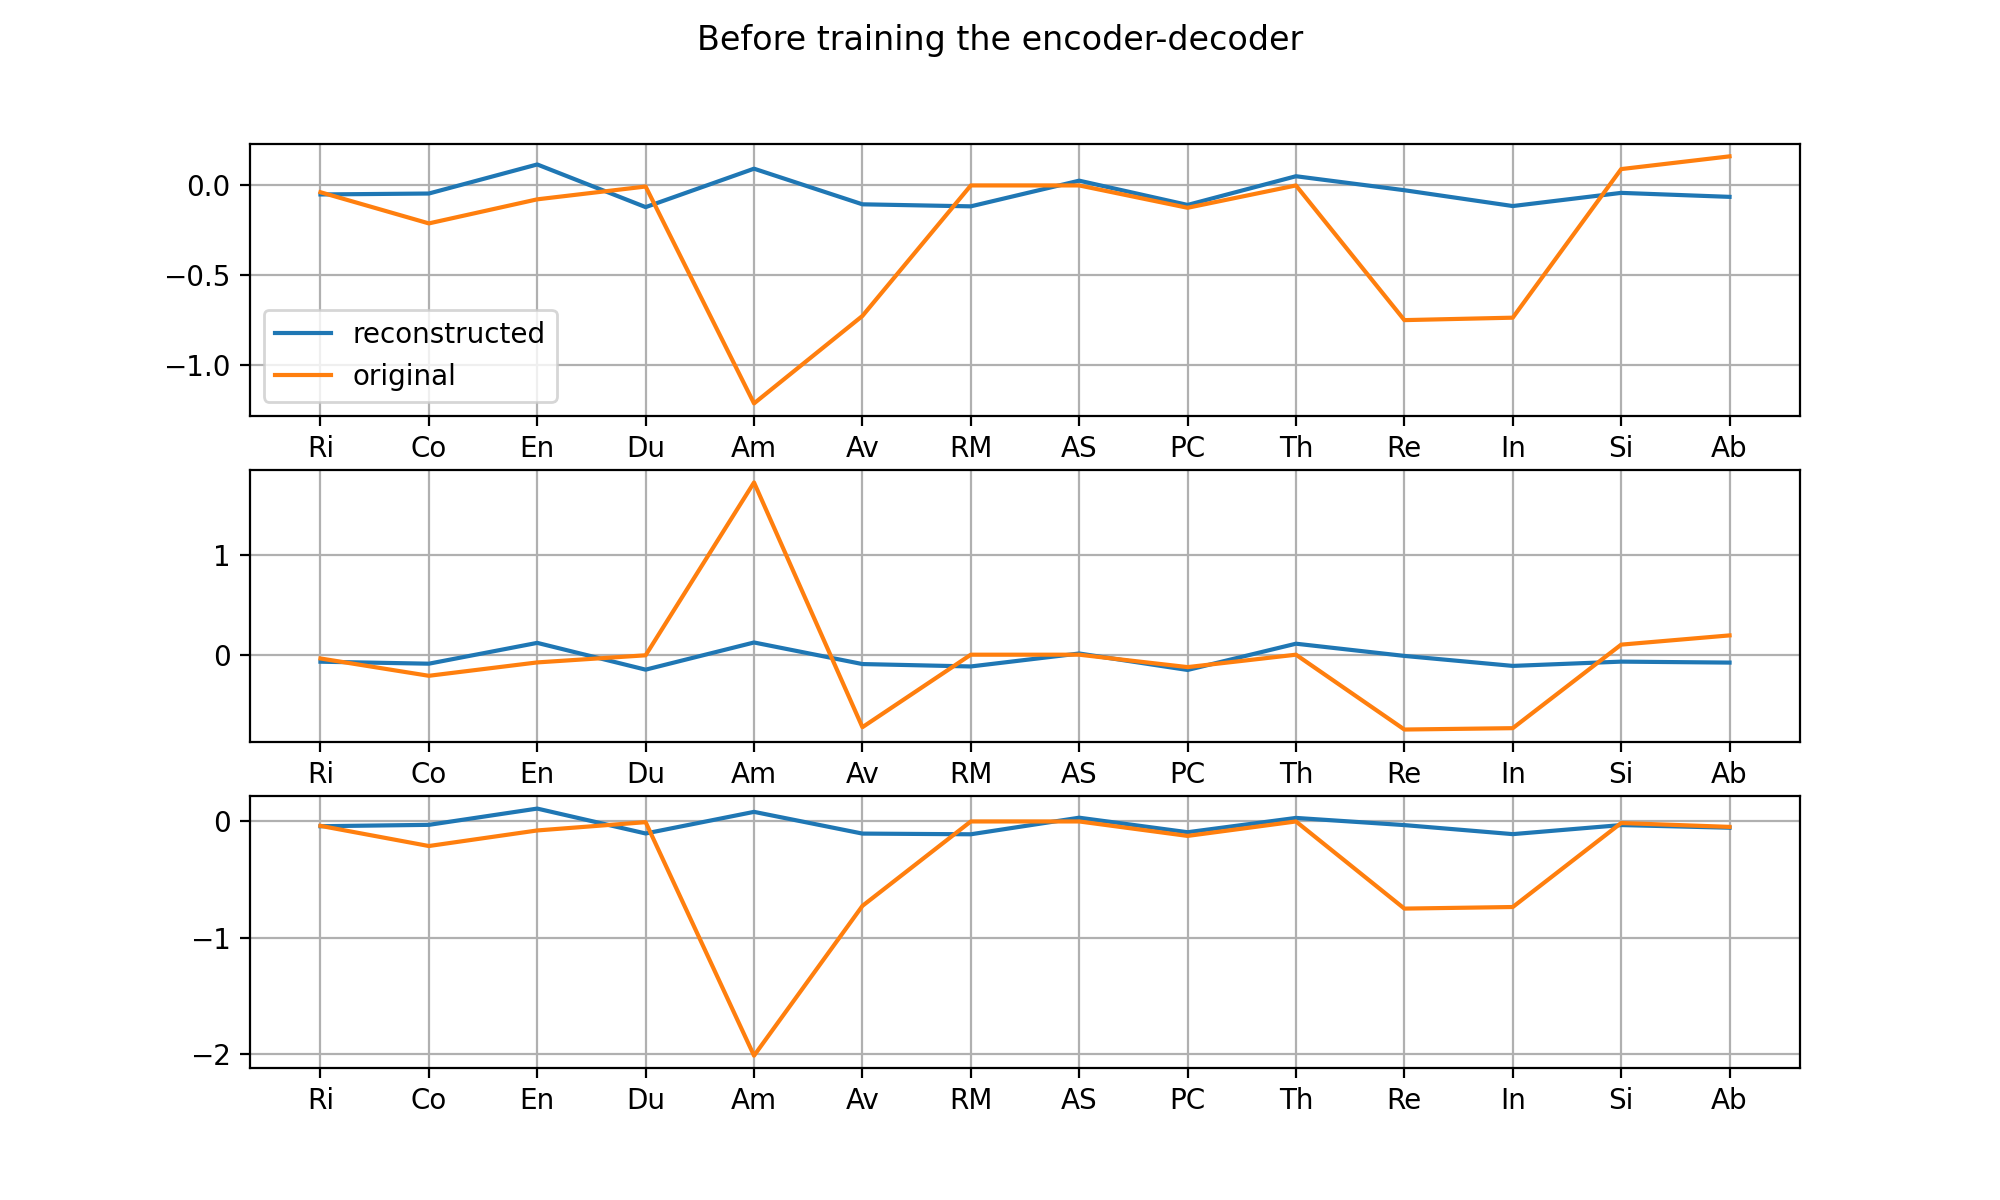

1/1 [==============================] - 0s 24ms/step


/var/folders/59/z60x1jpj5cv548__gm4sclp00000gn/T/ipykernel_29475/4110717532.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[i].set_xticklabels(acoustic_hits_headers_short)


1/1 [==============================] - 0s 29ms/step


In [1132]:
import random

# Plot original dataset and recontructed data set before training. We expect there to be large differences between
# the original and reconstruction as the autoencoder is not trained.

# Extract headers of acoustic hits dataset as a list of strings
acoustic_hits_headers = data.columns.tolist()

acoustic_hits_headers_short = []
for i in range(len(acoustic_hits_headers)):
    acoustic_hits_headers_short.append(acoustic_hits_headers[i][0:2])

# Code from https://ekamperi.github.io/machine%20learning/2021/01/21/encoder-decoder-model.html
def plot_orig_vs_recon(title='', n_samples=3):
    fig = plt.figure(7, figsize=(10,6))
    plt.suptitle(title)
    for i in range(3):
        plt.subplot(3, 1, i+1)
        idx = random.sample(range(x_train.shape[0]), 1)
        plt.plot(autoencoder.predict(x_train[idx]).squeeze(), label='reconstructed' if i == 0 else '')
        plt.plot(x_train[idx].squeeze(), label='original' if i == 0 else '')
        fig.axes[i].set_xticklabels(acoustic_hits_headers_short)
        plt.xticks(np.arange(0, 14, 1))
        plt.grid(True)
        if i == 0: plt.legend();

plot_orig_vs_recon('Before training the encoder-decoder')

In [1133]:
plt.close()

In [1134]:
# Training the autoencoder
from keras.callbacks import EarlyStopping

# Early stopping stops the training of the neural network if the validation loss starts increasing (to prevent overfitting)
# If the patience parameter is set to X number of epochs or iterations, then the training will terminate only
# if there is no improvement in the monitor performance measure for X epochs or iterations in a row.
early_stopping = EarlyStopping(monitor='val_loss', patience=40)

# Batch size refers to the number of training examples used in one iteration of the model. In other words,
# it is the number of samples that are processed at once by the deep learning model during training.
model_history = autoencoder.fit(x_train, x_train, epochs=1000, batch_size=32, verbose=0, validation_split=0.2, callbacks=[early_stopping])

<IPython.core.display.Javascript object>


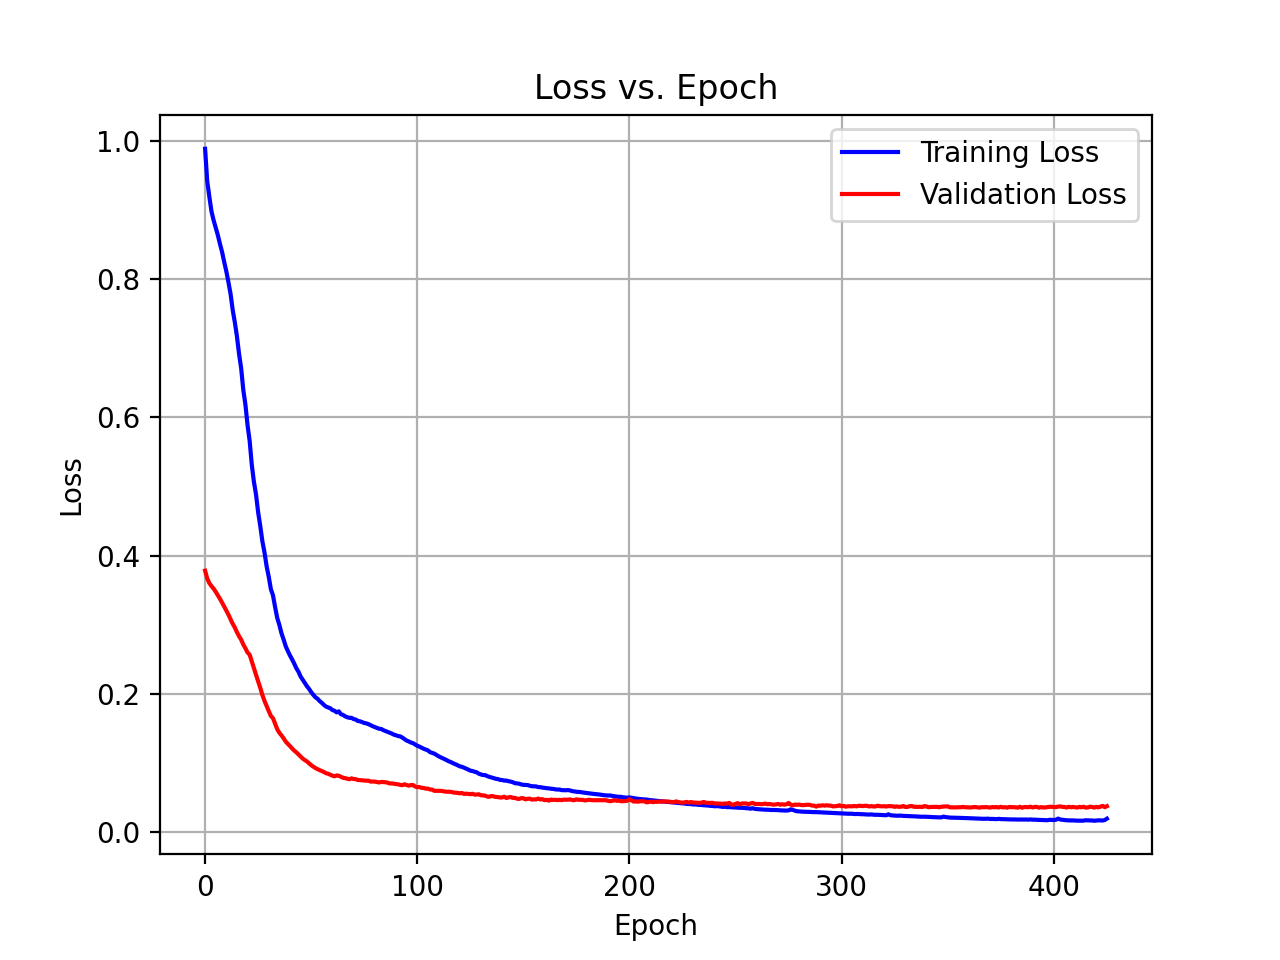

In [1140]:
# Plot the loss vs. epochs of training
epochs = range(len(model_history.history['val_loss']))

fig = plt.subplots()
plt.plot(epochs, model_history.history["loss"], 'b', label='Training Loss')
plt.plot(epochs, model_history.history["val_loss"], 'r', label='Validation Loss')
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)
plt.legend()
plt.show()

In [1141]:
plt.close()

<IPython.core.display.Javascript object>


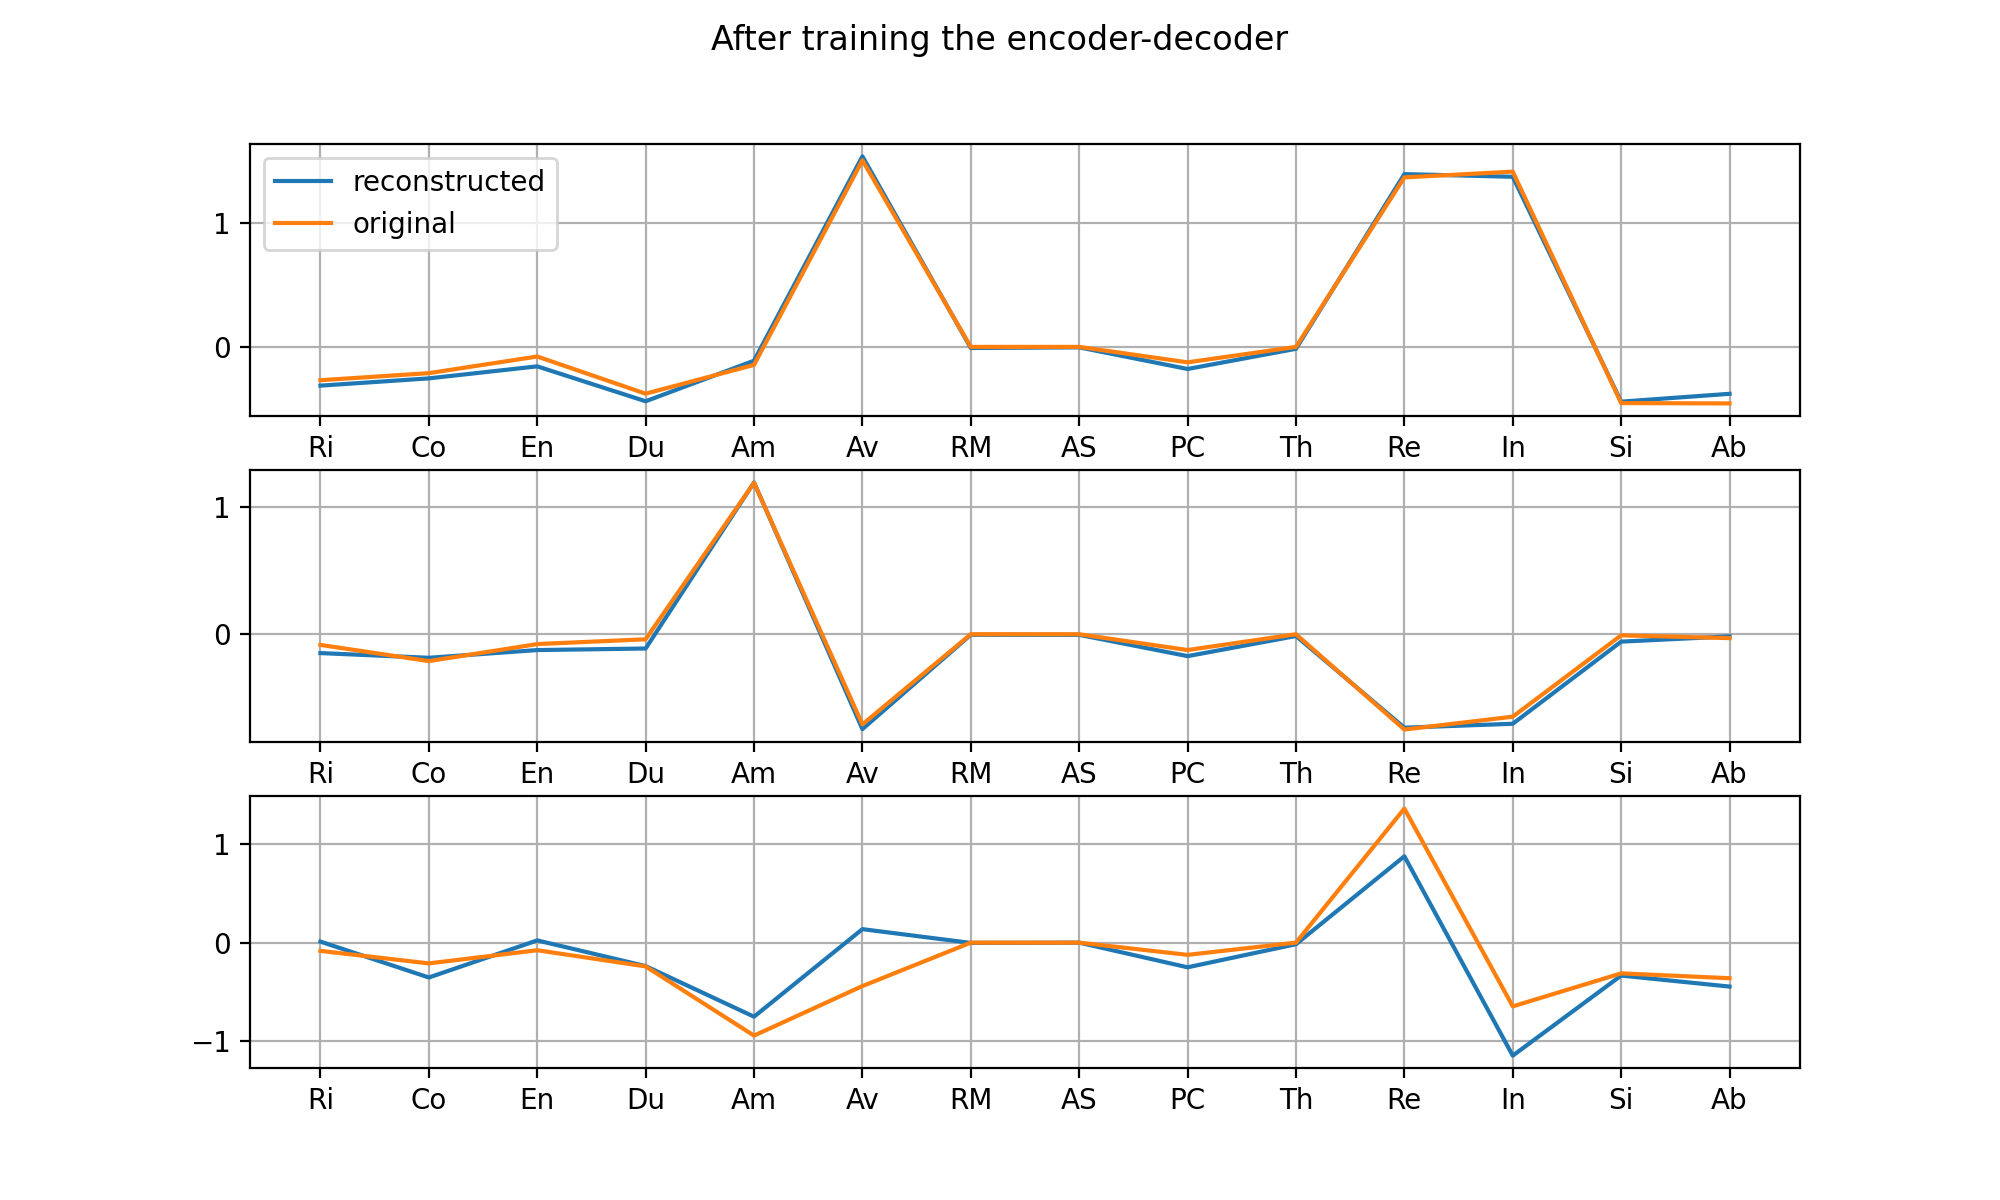

1/1 [==============================] - 0s 30ms/step


/var/folders/59/z60x1jpj5cv548__gm4sclp00000gn/T/ipykernel_29475/4110717532.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig.axes[i].set_xticklabels(acoustic_hits_headers_short)


1/1 [==============================] - 0s 42ms/step


In [1142]:
# Difference between original dataset and reconstruction after training the neural network
plot_orig_vs_recon('After training the encoder-decoder')

In [1143]:
plt.close()

<IPython.core.display.Javascript object>


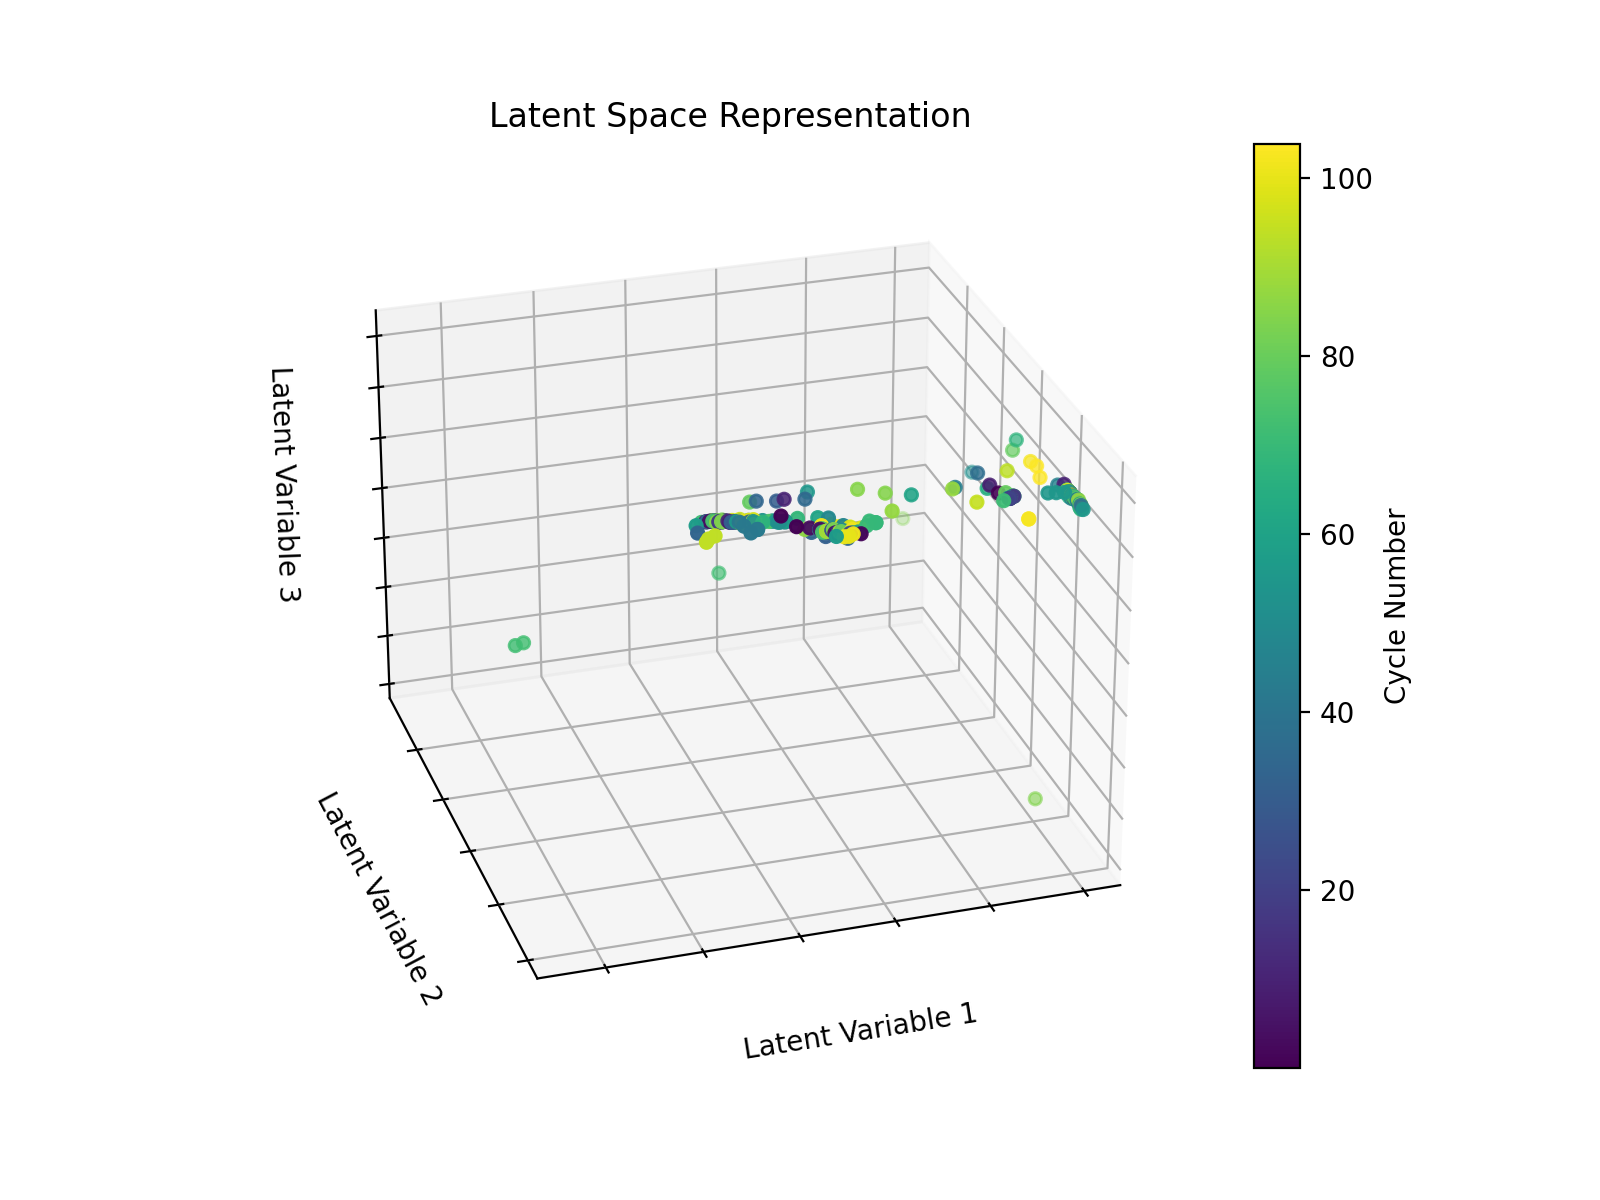

In [1144]:
# 3D Plot of our latent space representation
encoded_x_train = encoder(x_train)

fig8 = plt.figure(8, figsize=(8,6))
ax13 = fig8.add_subplot(111, projection="3d", elev=-150, azim=110)

# Add the c parameter to scatter, specifying color based on reg_targets
scatter = ax13.scatter(
    encoded_x_train[:,0],
    encoded_x_train[:,1],
    encoded_x_train[:,2],
    c=reg_targets,  # Use reg_targets for color
    cmap=plt.cm.viridis  # Choose a colormap (you can change it to any colormap you prefer)
)
ax13.set_title("Latent Space Representation")
ax13.set_xlabel("Latent Variable 1")
ax13.xaxis.set_ticklabels([])
ax13.set_ylabel("Latent Variable 2")
ax13.yaxis.set_ticklabels([])
ax13.set_zlabel("Latent Variable 3")
ax13.zaxis.set_ticklabels([])

cbar = fig8.colorbar(scatter)
cbar.set_label('Cycle Number')

plt.show()

In [1147]:
plt.close()

<IPython.core.display.Javascript object>


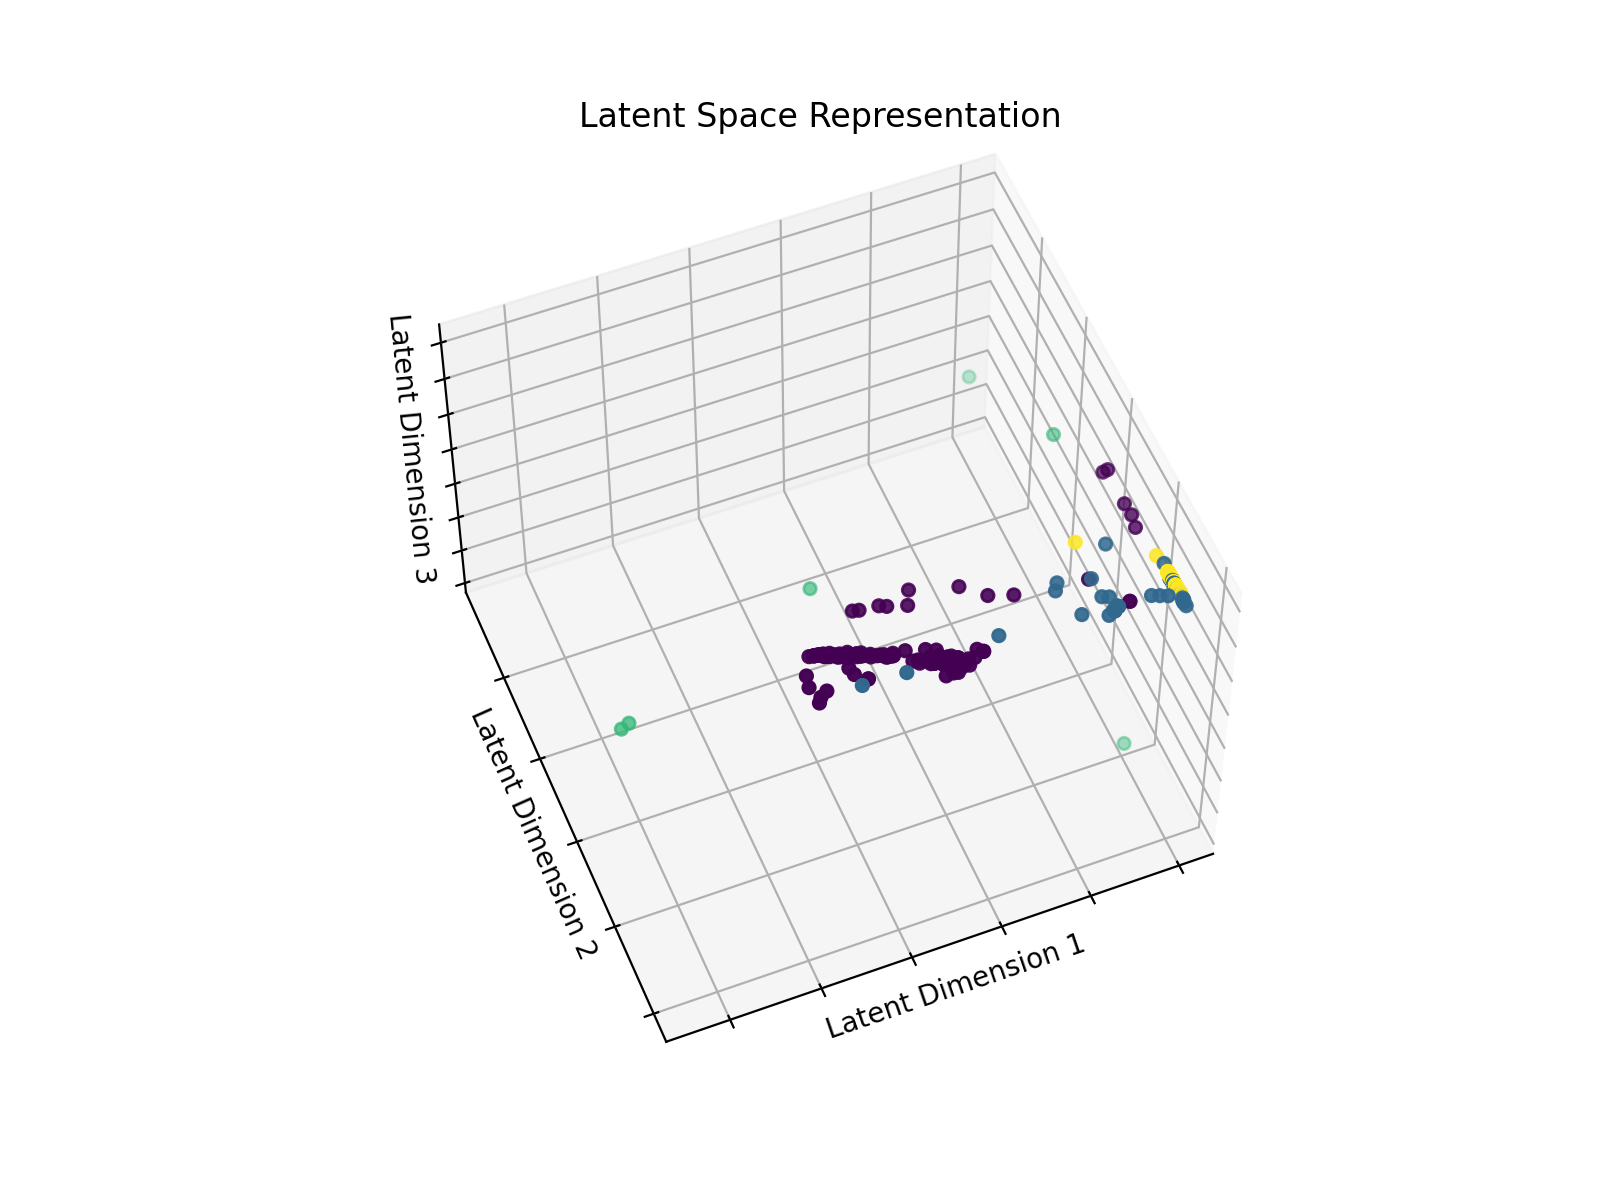

In [1145]:
from sklearn.cluster import KMeans

# k-means clustering
kmeans = KMeans(n_clusters = 4, random_state = 0, n_init='auto') # set up algorithm
autoencoder_hits_clusters = kmeans.fit(encoded_x_train) # fit data using model
labels = autoencoder_hits_clusters.labels_ # get labels from clustering analysis

# Create proxy artists for the legend based on cluster labels
proxy_artists = []
for label in range(4):  # Assuming you have 4 clusters
    color = plt.cm.tab10(label / 4.0)  # Use the same color mapping as the scatter plot
    proxy_artists.append(plt.Line2D([0], [0], linestyle='none', marker='o', markersize=8, markerfacecolor=color, label=f'Cluster {label}'))


# Plot the figure
fig9 = plt.figure(9, figsize=(8,6))
ax2 = fig9.add_subplot(111, projection="3d", elev=-150, azim=110)
ax2.scatter(
    encoded_x_train[:,0],
    encoded_x_train[:,1],
    encoded_x_train[:,2],
    c=labels.astype(float))

ax2.set_title("Latent Space Representation")
ax2.set_xlabel("Latent Dimension 1")
ax2.xaxis.labelpad = -11  # Decrease the space between x-axis label and axis
ax2.xaxis.set_ticklabels([])

ax2.set_ylabel("Latent Dimension 2")
ax2.yaxis.labelpad = -11  # Decrease the space between y-axis label and axis
ax2.yaxis.set_ticklabels([])

ax2.set_zlabel("Latent Dimension 3")
ax2.zaxis.labelpad = -11  # Decrease the space between z-axis label and axis
ax2.zaxis.set_ticklabels([])

plt.show()

In [1146]:
plt.close()